In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import os
import collections

import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm
import h5py
import pandas as pd
import json
import tabulate

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))


In [6]:

from param import args

'''predefined at param.py'''
args.config = r'configs/vqa.json'
args.output = r'snap/vqa_test'
args.test = 'val'
args.load = r'snap/vqa'
args.weight_disable = True
args.kl_divergence = False
args.multiGPU =False
args.num_workers =0
args.save_folder ="test"

'''modify src\tools\sharearray cache path to current folder'''

from pretrain.qa_answer_table import AnswerTable,load_lxmert_qa, load_lxmert_from_sgg_and_lxmert_pretrain, load_lxmert_from_pretrain_noqa
from tasks.vqa_model import VQAModel
from tasks.vqa_data import VQADataset, VQATorchDataset, VQAEvaluator

from utils import load_lxmert_sgg

'''load tokenizer'''
from lxrt.tokenization import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(
    args.huggingface+"bert-base-uncased",
    do_lower_case=True
)

DataTuple = collections.namedtuple("DataTuple", 'dataset loader evaluator')

INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


self.symbolic_embedding_number: 2003


In [12]:
from src.PWI_func import VQA,PWI_FixedReplace_QuesModify_Embed,a2b,b2c,shift,list_mul,get_data_tuple

# 0) load trained VQA model


In [14]:

'''load vqa fine-tuned model'''
args.load_lxmert_pretrain = None# "snap/pretrained/CC_Unsupervised_LXRT.pth"
args.load_lxmert_qa = "snap/vqa_test/TRAINLAST.pth"
args.load_lxmert = None
print(args.load_lxmert)
print(args.load_lxmert_pretrain)
print(args.load_lxmert_qa)

vqa = VQA();

None
None
snap/vqa_test/TRAINLAST.pth
splits: train,nominival
Load 632117 data from split(s) train,nominival.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.
data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


Use 443757 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
splits: minival
Load 25994 data from split(s) minival.
['minival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt
INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt
INFO:lxrt.modeling:loading archive file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased
INFO:lxrt.modeling:Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "symbolic_embedding_number": 2003,
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['minival']
Use 25994 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
#################################
args.output_attention: True
LXRT encoder with 12 l_layers, 0 x_layers, and 0 r_layers.


!! Has 12 layers


INFO:lxrt.modeling:Weights of LXRTFeatureExtractionAttention not initialized from pretrained model: ['bert.embeddings.symbolic_embedding.weight', 'bert.embeddings.token_type_embeddings_visual.weight', 'bert.embeddings.position_embeddings_visual.weight', 'bert.embeddings.visn_fc.weight', 'bert.embeddings.visn_fc.bias', 'bert.embeddings.visn_layer_norm.weight', 'bert.embeddings.visn_layer_norm.bias', 'bert.embeddings.box_fc.weight', 'bert.embeddings.box_fc.bias', 'bert.embeddings.box_layer_norm.weight', 'bert.embeddings.box_layer_norm.bias', 'bert.embeddings.tag_layer_norm.weight', 'bert.embeddings.tag_layer_norm.bias', 'bert.encoder.visn_fc.visn_fc.weight', 'bert.encoder.visn_fc.visn_fc.bias', 'bert.encoder.visn_fc.visn_layer_norm.weight', 'bert.encoder.visn_fc.visn_layer_norm.bias', 'bert.encoder.visn_fc.box_fc.weight', 'bert.encoder.visn_fc.box_fc.bias', 'bert.encoder.visn_fc.box_layer_norm.weight', 'bert.encoder.visn_fc.box_layer_norm.bias']
INFO:lxrt.modeling:Weights from pretrained

Load QA pre-trained LXMERT from snap/vqa_test/TRAINLAST.pth 
Loaded 0 answers from LXRTQA pre-training and 0 not

BertAdam Total Iters: 110936
BERTAdam lr 5e-05 total_steps 110936  warmup 0.1


In [20]:
'''train'''
object_file = "object_list_animal_v10"
#object_file = "object_list_food_v10"

'''nominival'''
object_file = "object_list_animal_nominival_v10"
object_file = "object_list_food_nominival_v10"

if object_file == "object_list_animal_v10":
        from data.PWI.object_list_animal_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
elif object_file == "object_list_food_v10":
    from data.PWI.object_list_food_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
elif object_file == "object_list_animal_nominival_v10":
    from data.PWI.object_list_animal_nominival_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list  
elif object_file == "object_list_food_nominival_v10":
    from data.PWI.object_list_food_nominival_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list 
    
print(len(food_list),food_list)
print(len(animal_list),animal_list)
print(len(food_list_cate),len(pseudo_list),len(hypernymy_list))
Nscan_food = len(food_list)
Nscan = len(animal_list)

print(Nscan_food,Nscan)

13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
14 14 14
13 14


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
79
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 79 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 79 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[622]
[2120]


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.61it/s]


79
2
2
2


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]


2


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.52it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
49
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 49 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 49 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[837]
[1675]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.86it/s]


49
1
1
1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.84it/s]


1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.78it/s]
C:\Users\lab\anaconda3\envs\visualbert\lib\site-packages\ipykernel_launcher.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.82it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
166
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 166 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 166 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[172]
[1677]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.71it/s]


166
61
61
61


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.70it/s]


61


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.70it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
388
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 388 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 388 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[530]
[1831]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


388
205
205
205


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


205


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.07it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
423
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 423 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 423 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[223]
[3083]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


423
67
67
67


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


67


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
70
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 70 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 70 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[699]
[752]


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.99it/s]


70
12
12
12


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.89it/s]


12


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.00it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
252
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 252 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 252 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[276]
[2554]


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


252
44
44
44


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.47it/s]


44


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.47it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
309
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 309 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 309 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[856]
[1983]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.50it/s]


309
69
69
69


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.50it/s]


69


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.49it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
59
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 59 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 59 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[524]
[2648]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.55it/s]


59
17
17
17


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


17


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.50it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
166
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 166 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 166 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[1107]
[1414]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.59it/s]


166
42
42
42


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.61it/s]


42


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.54it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
347
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 347 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 347 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[178]
[3045]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.70it/s]


347
116
116
116


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.63it/s]


116


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.72it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
856
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 856 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 856 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[126]
[1726]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.61it/s]


856
694
694
694


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.62it/s]


694


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.62it/s]


13 ['pepper', 'cabbage', 'tomato', 'banana', 'apple', 'pasta', 'bread', 'cheese', 'egg', 'chocolate', 'sandwich', 'pizza', 'fries']
14 ['cat', 'dog', 'sheep', 'deer', 'cow', 'horse', 'zebra', 'elephant', 'goose', 'goat', 'bear', 'panda', 'pigeon', 'butterfly']
61
nominival_Anna_embed_v2
nominival_Anna_embed_v2
splits: nominival_Anna_embed_v2
Load 61 data from split(s) nominival_Anna_embed_v2.
['nominival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['nominival']
Use 61 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/objects_vocab.txt
[721]
[1470]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.48it/s]


61
25
25
25


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]


25


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.46it/s]


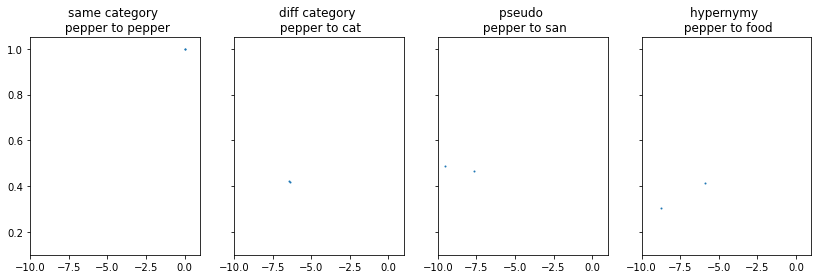

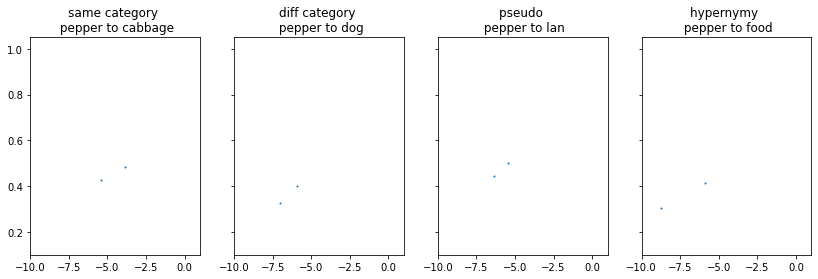

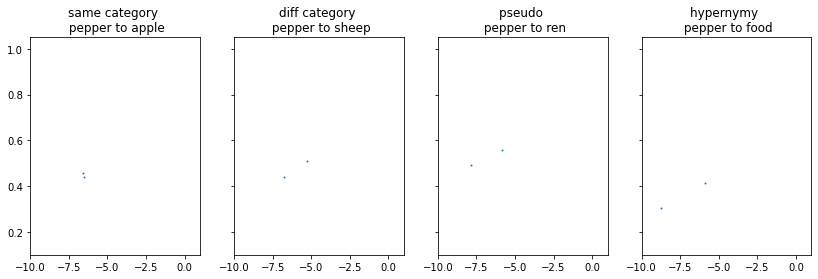

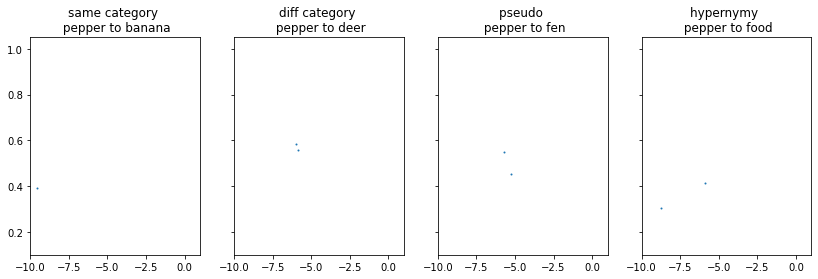

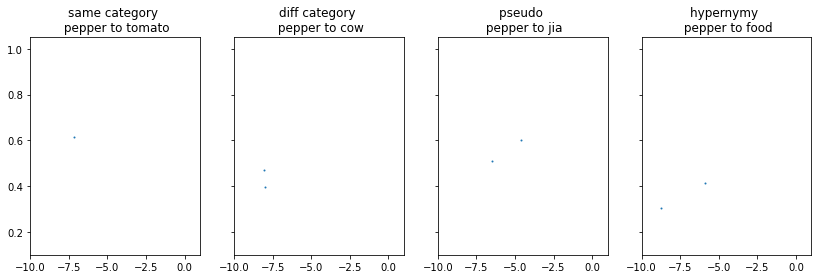

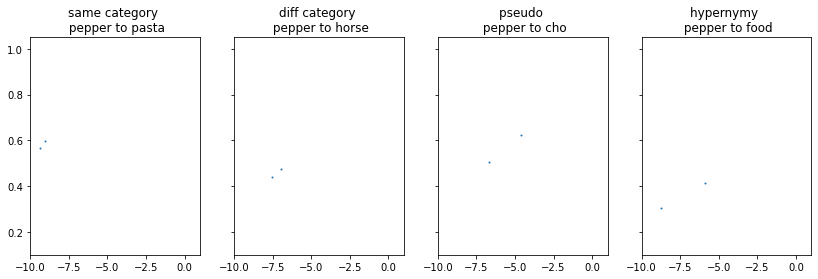

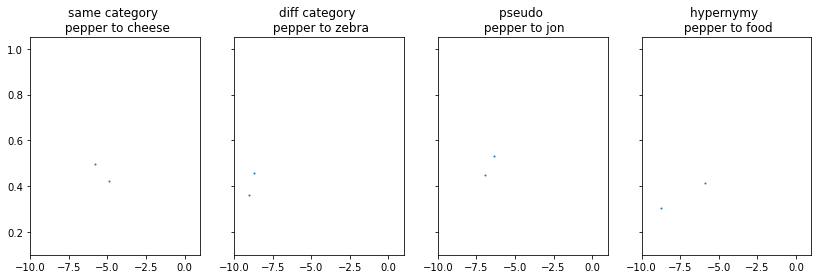

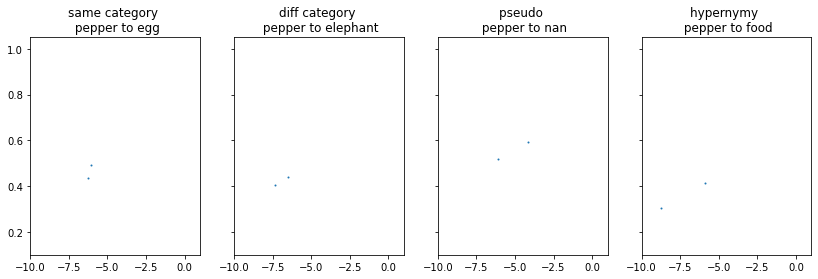

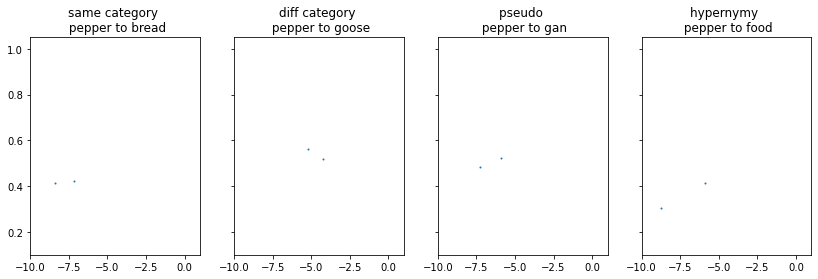

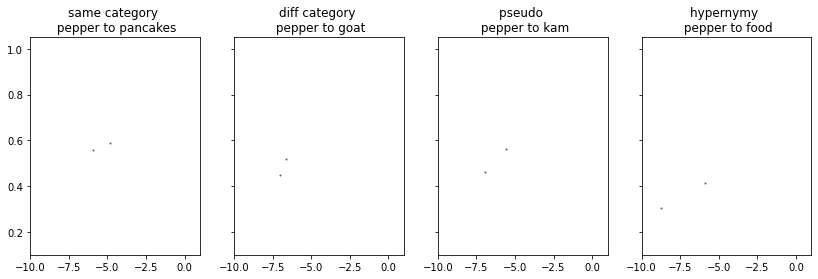

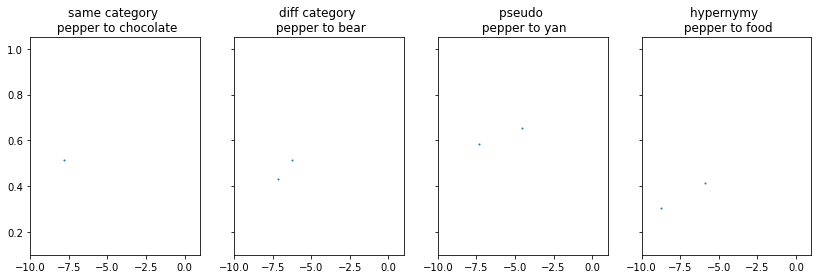

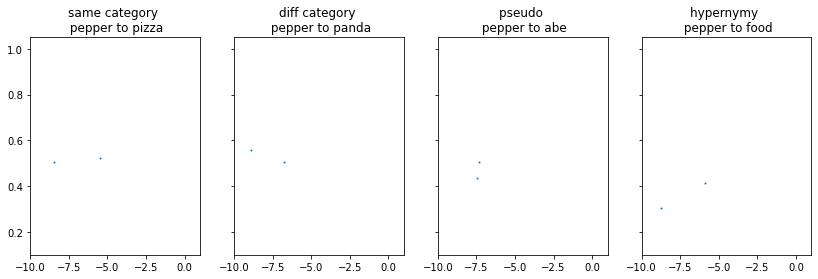

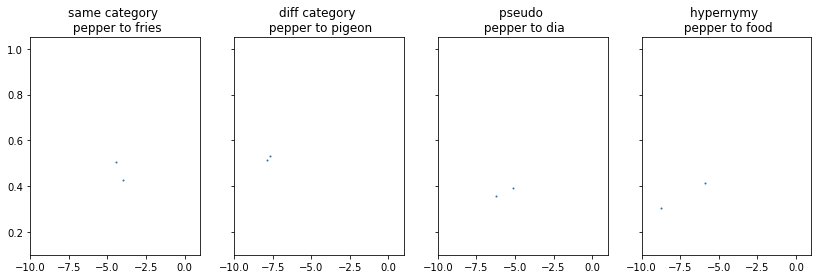

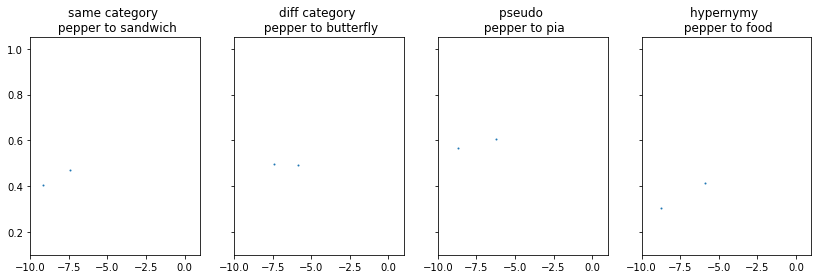

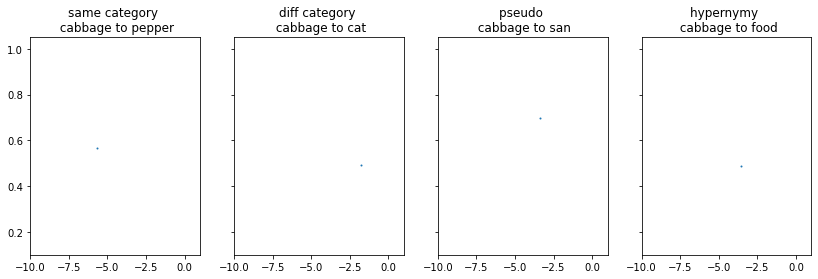

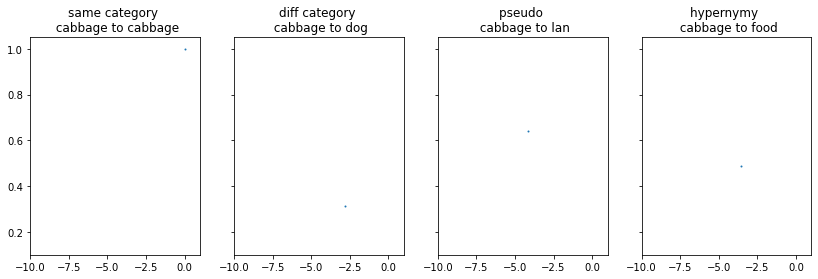

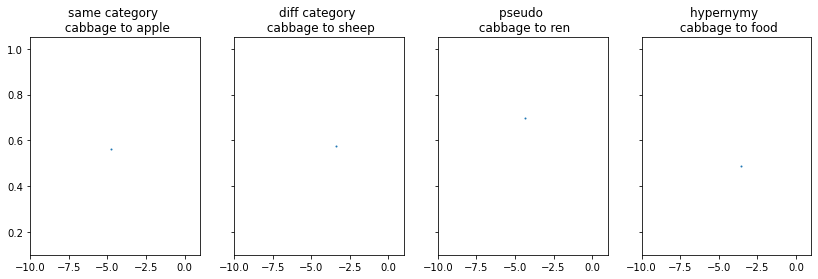

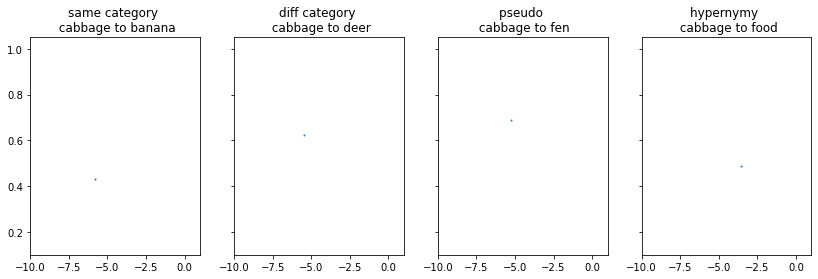

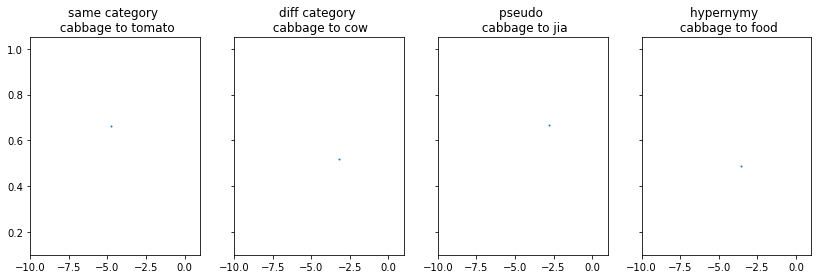

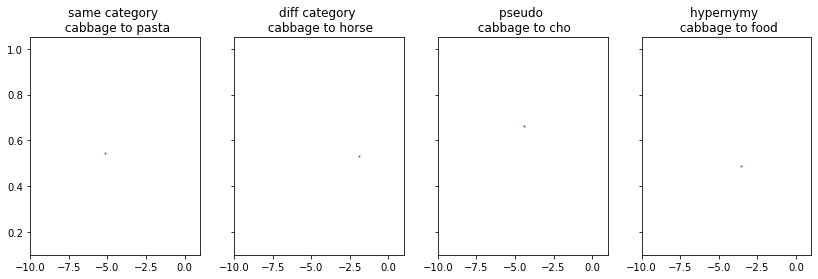

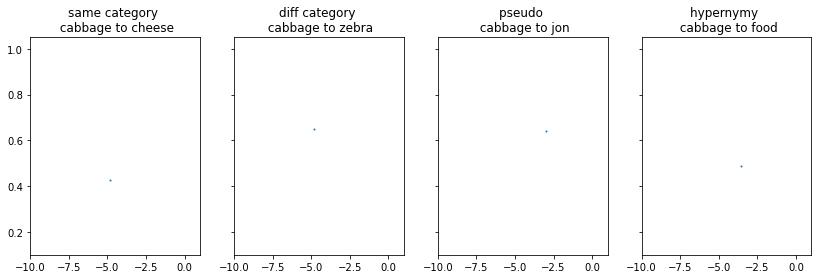

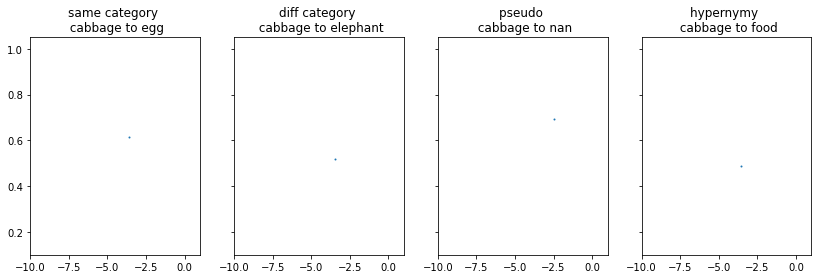

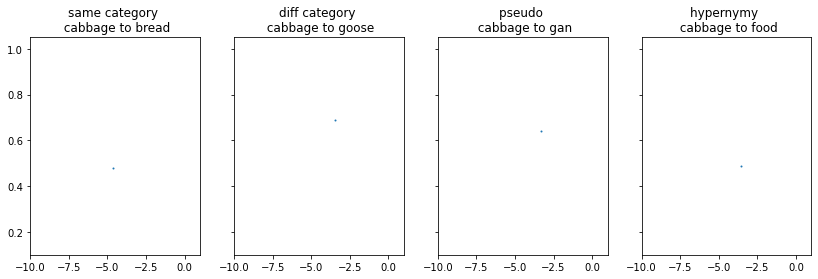

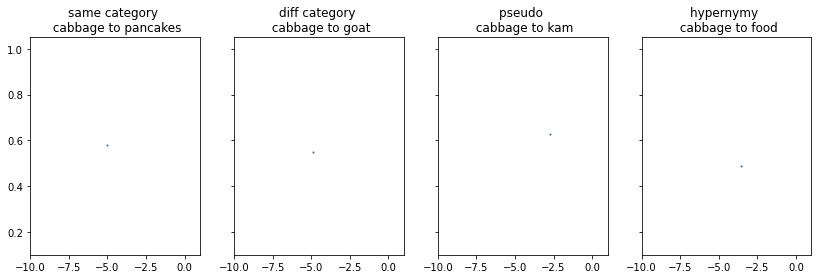

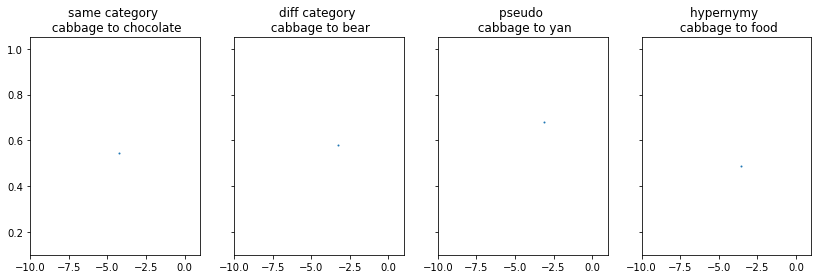

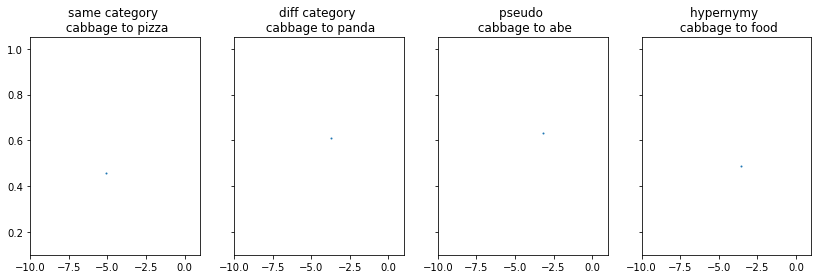

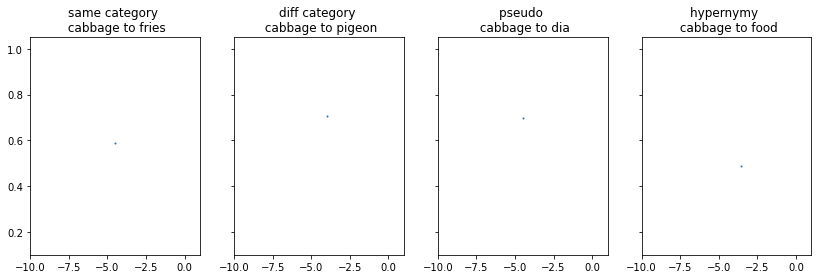

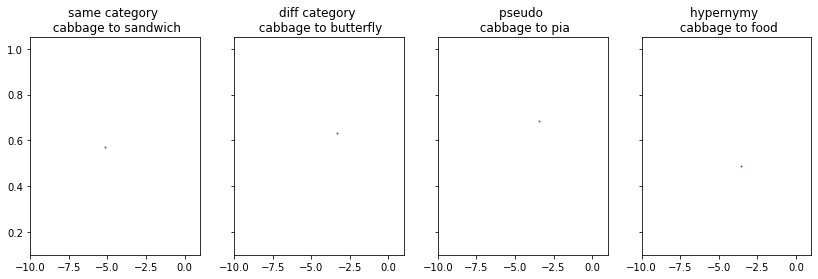

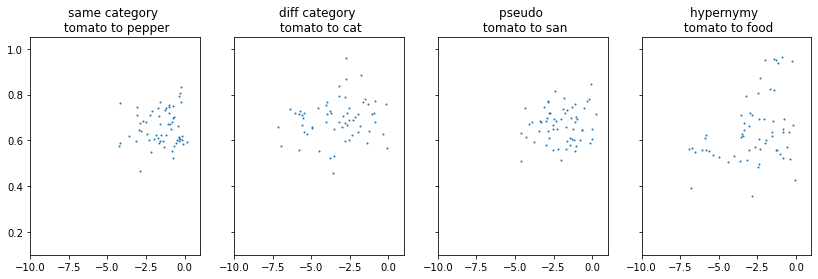

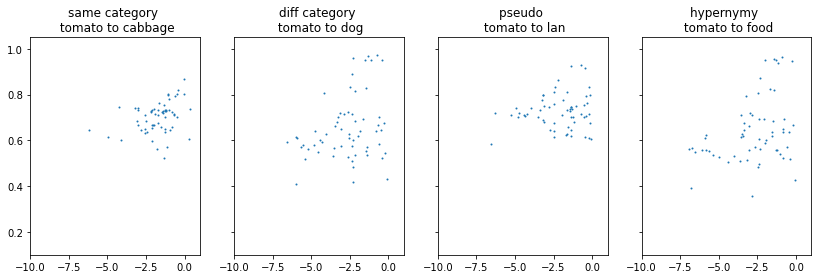

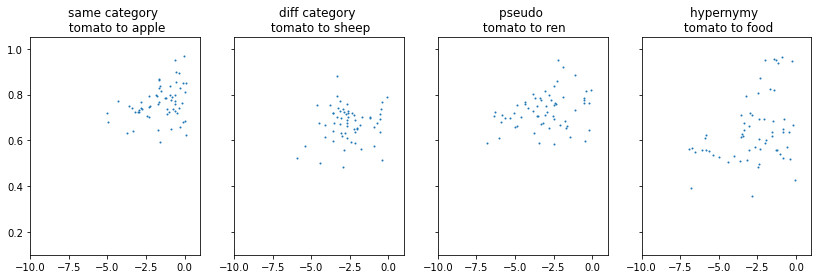

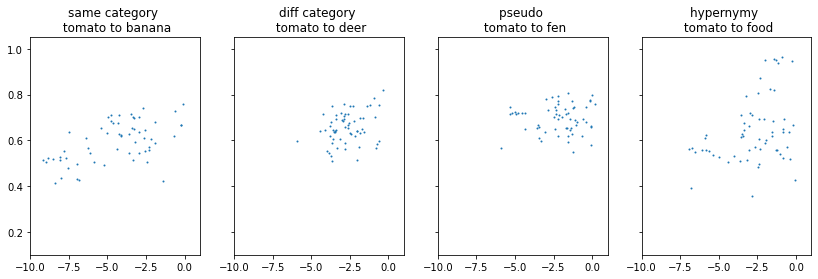

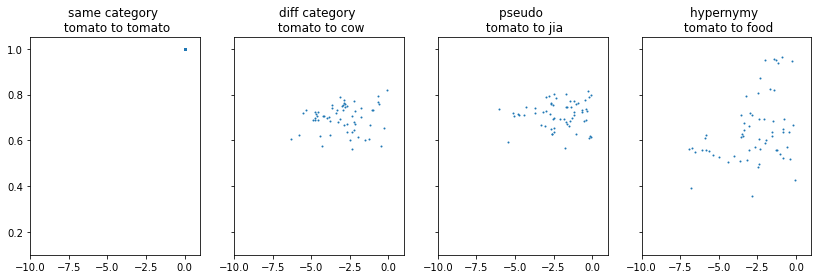

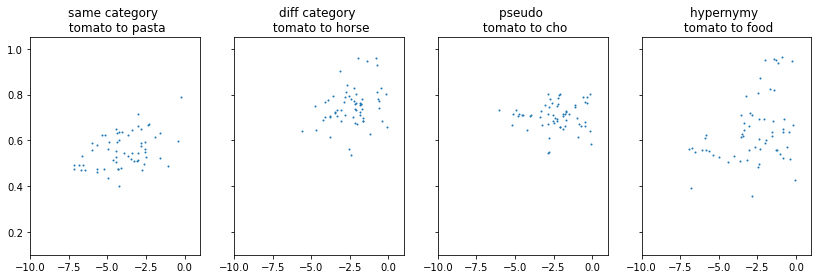

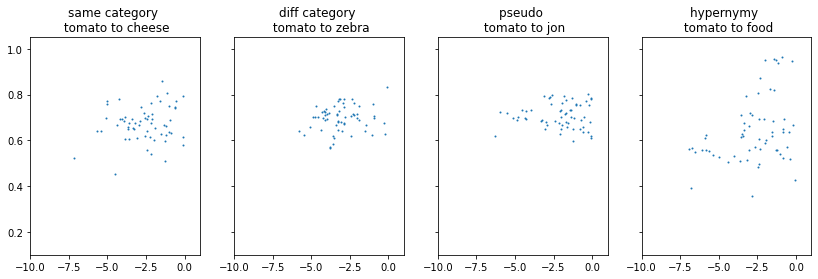

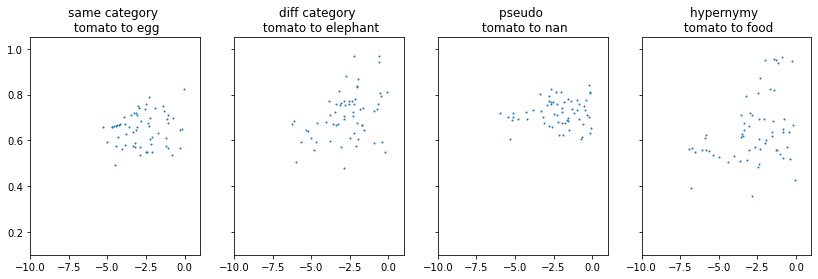

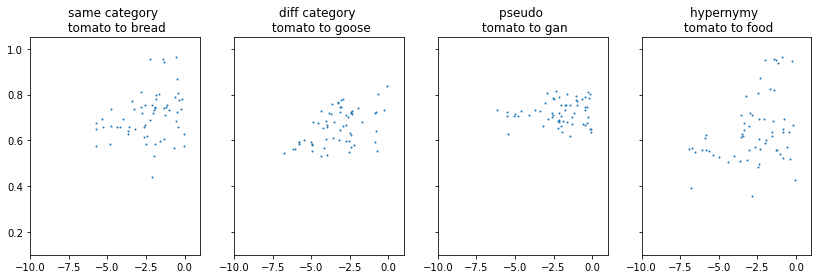

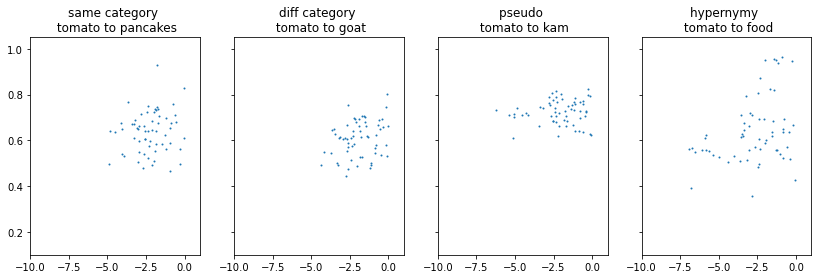

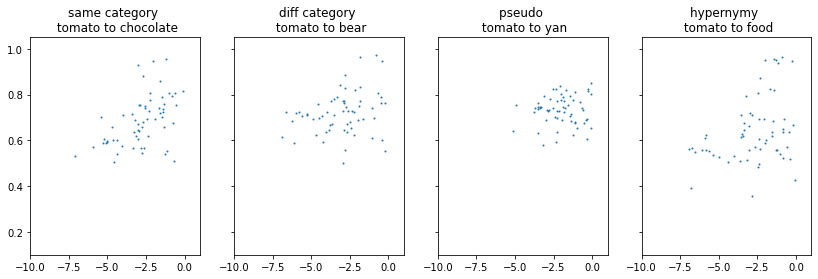

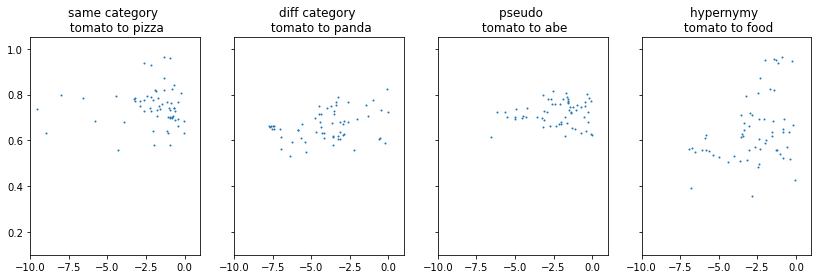

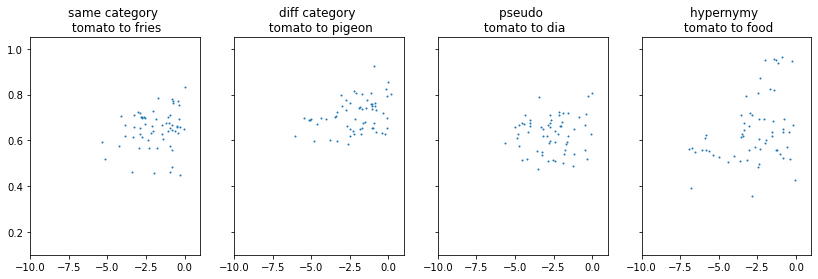

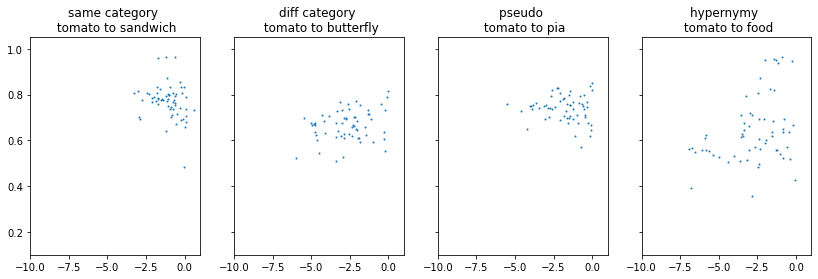

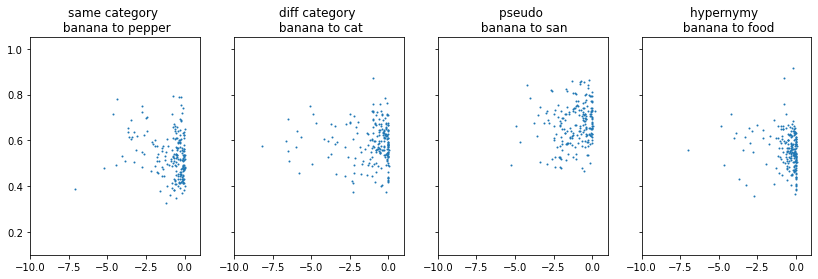

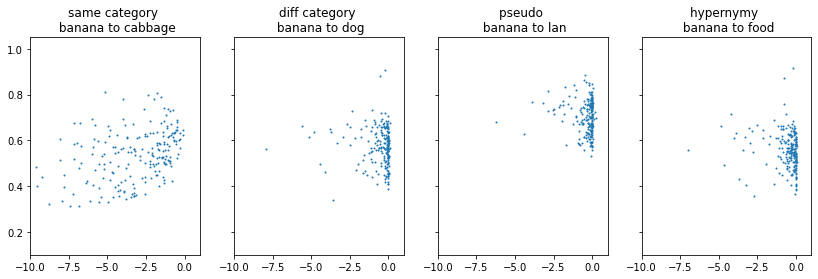

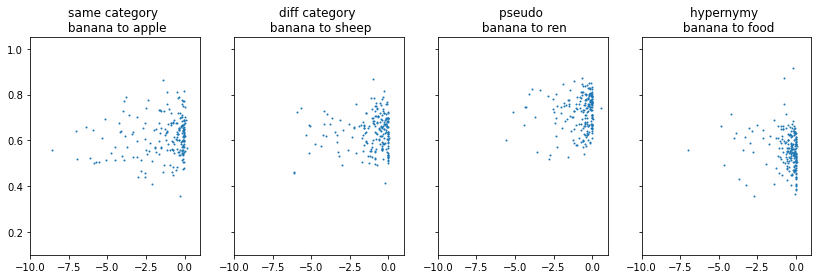

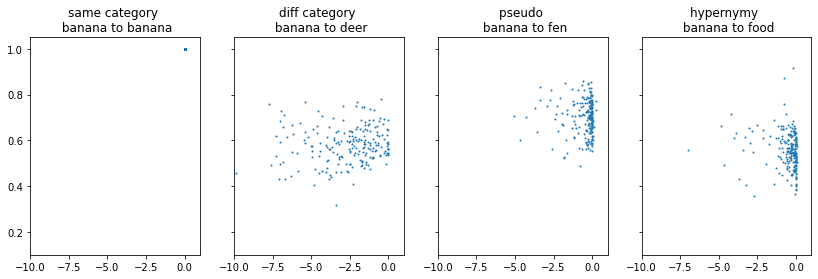

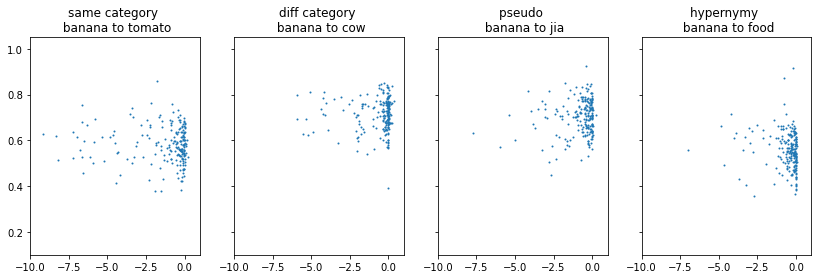

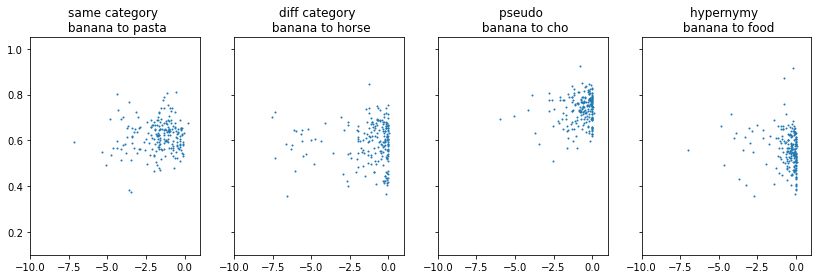

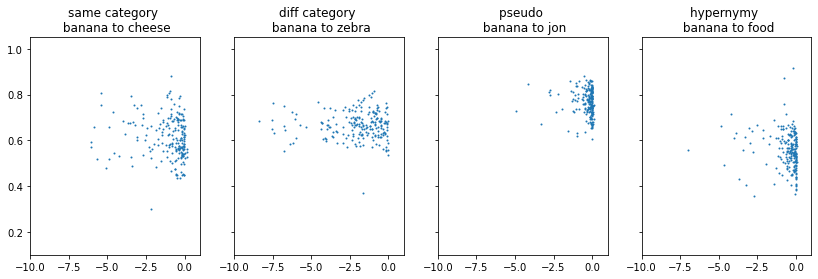

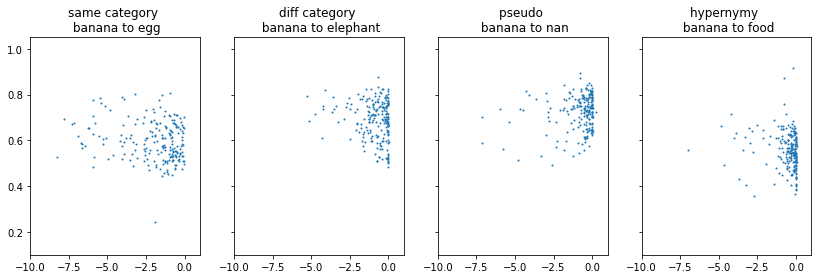

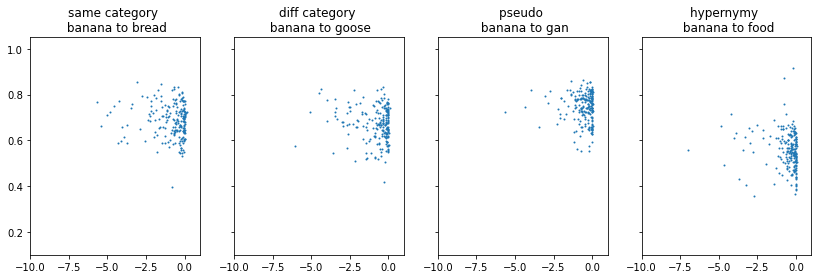

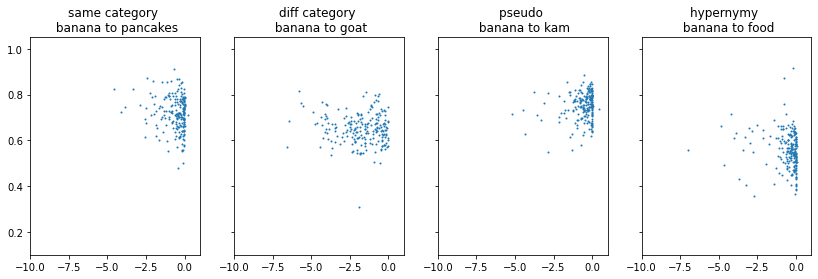

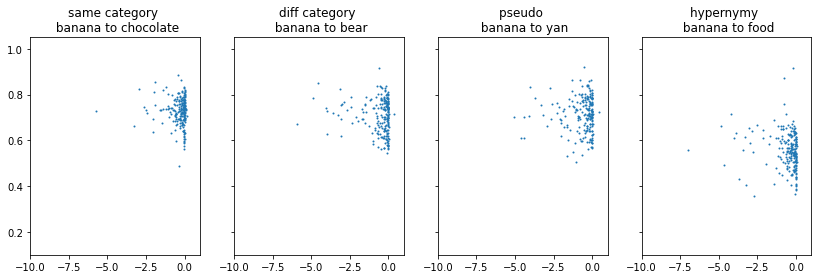

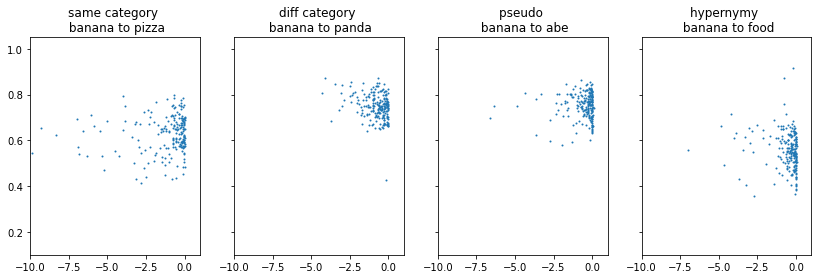

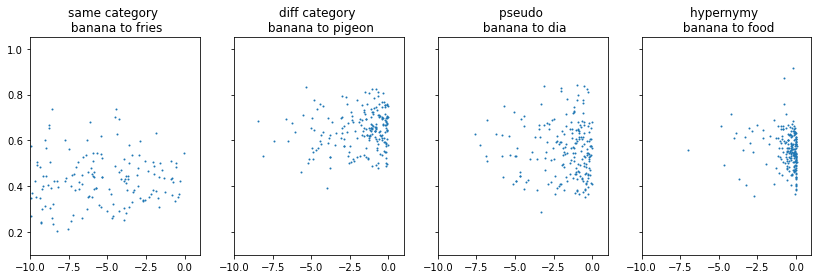

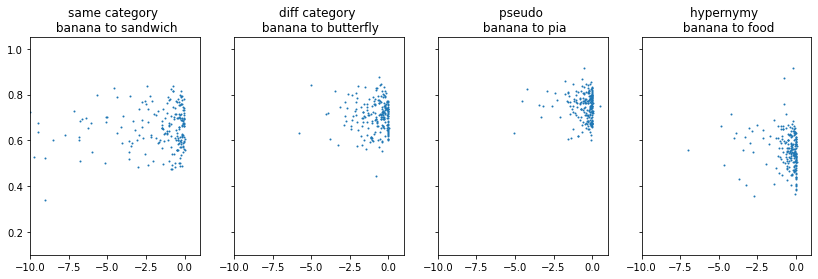

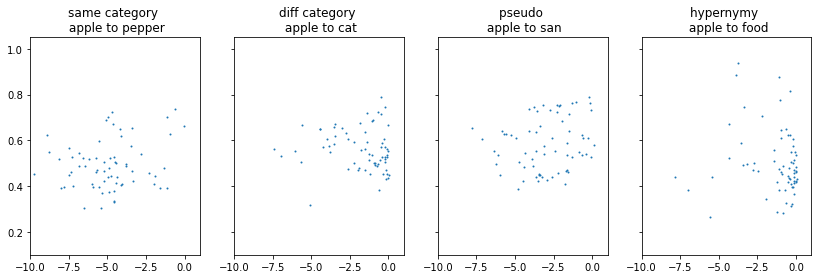

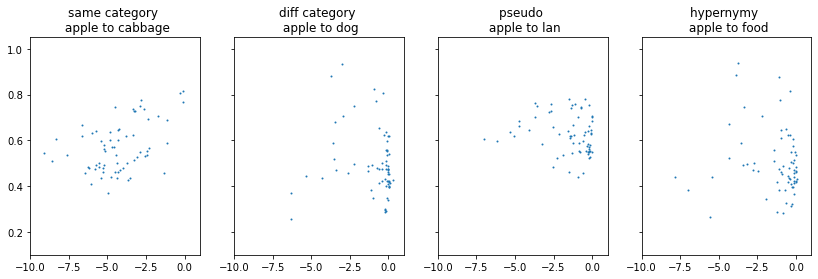

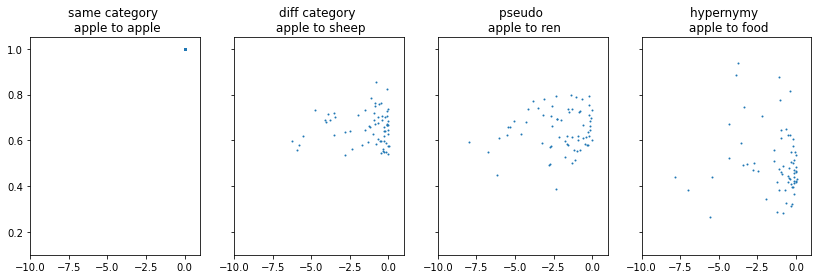

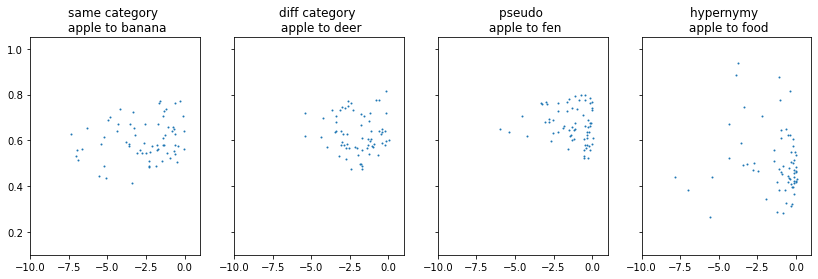

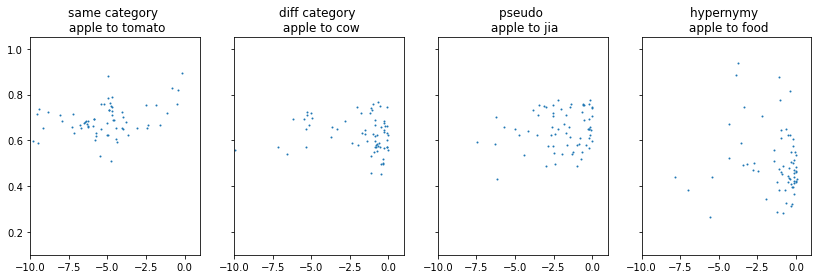

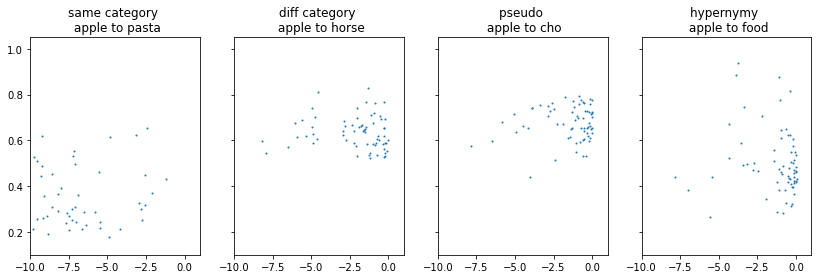

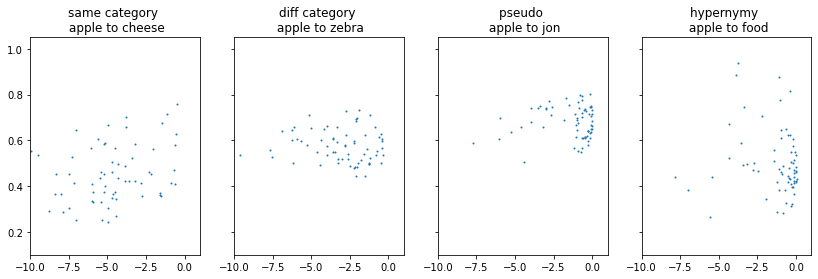

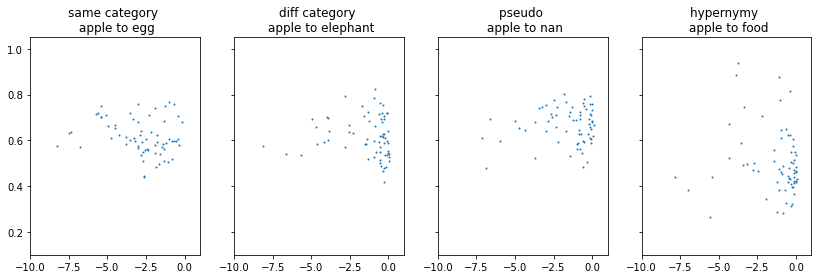

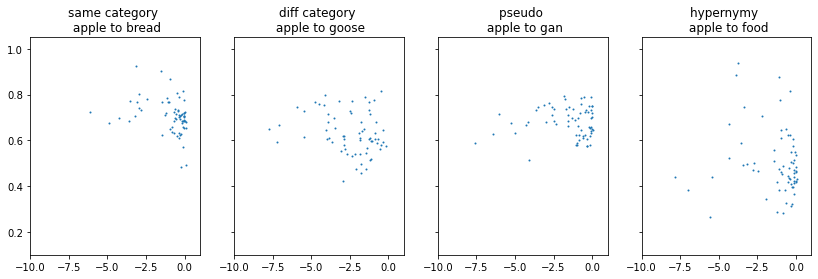

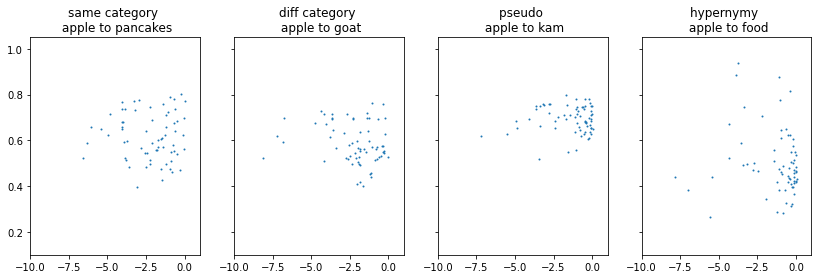

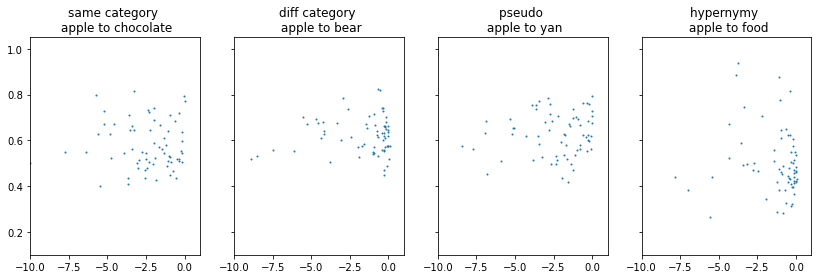

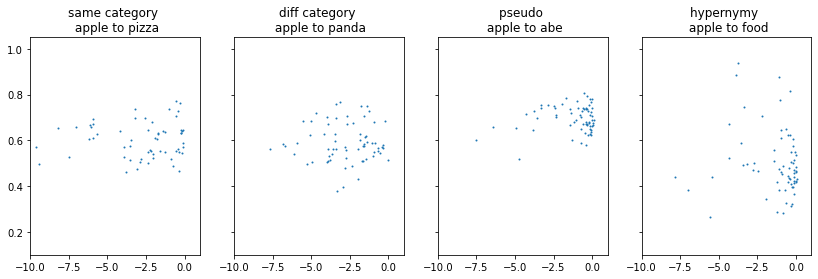

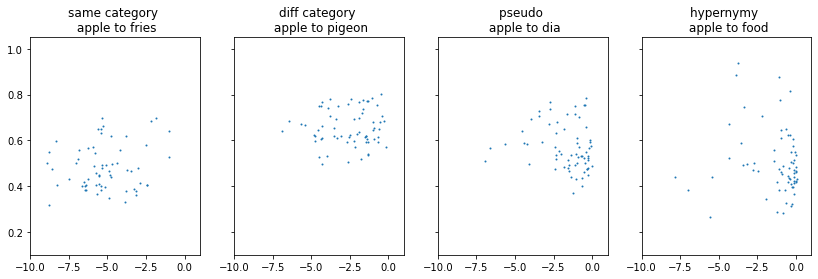

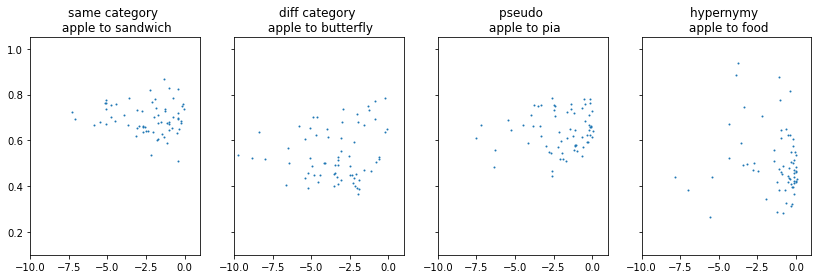

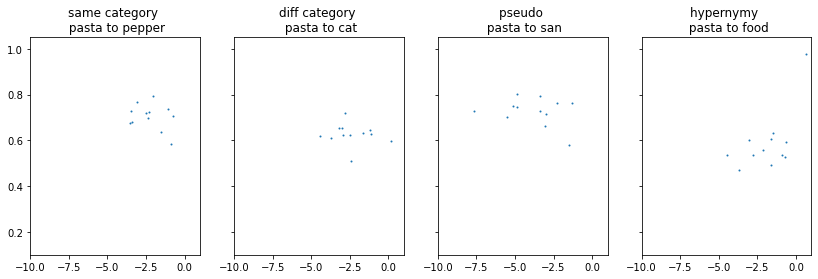

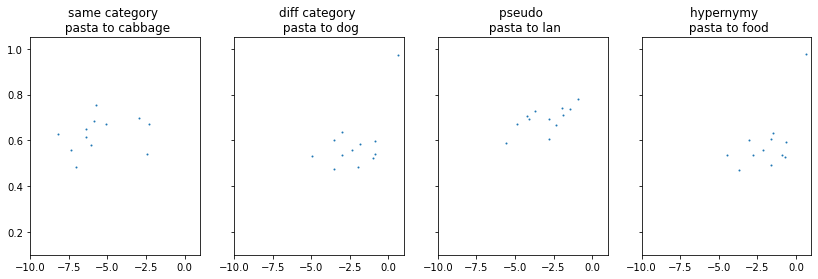

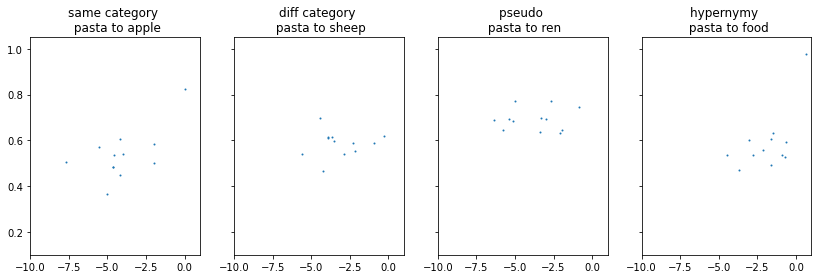

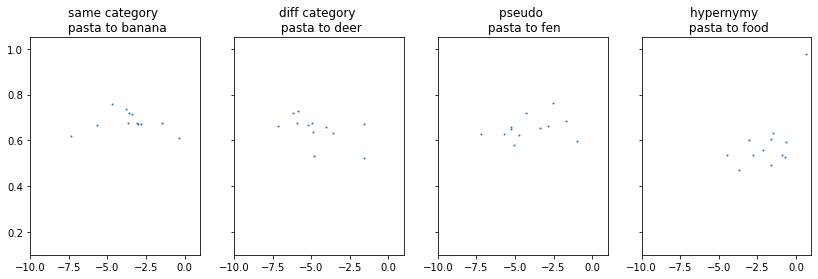

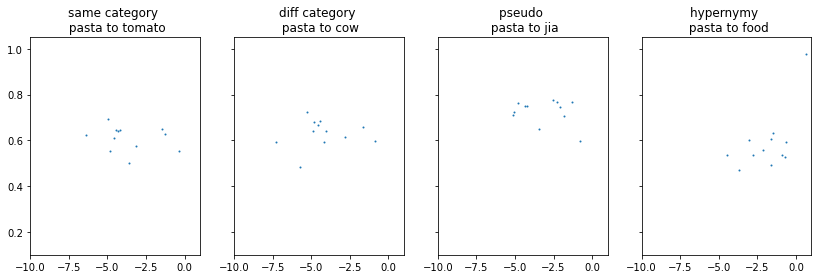

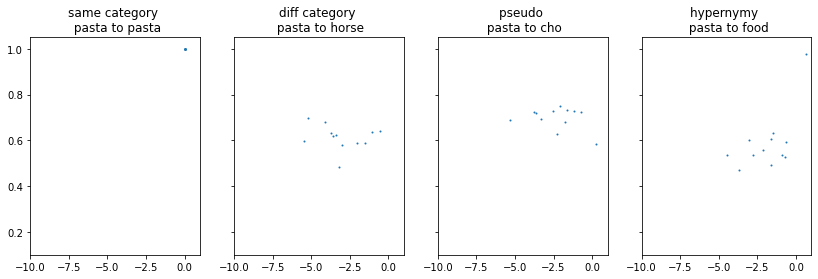

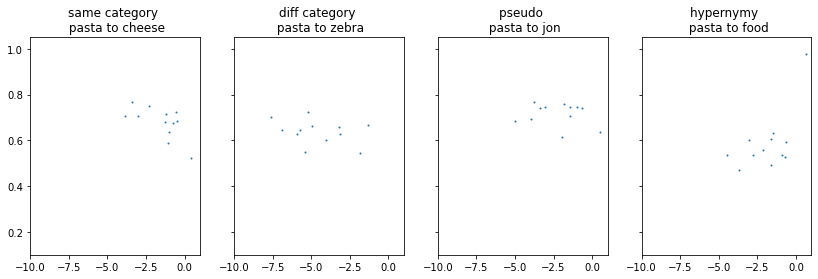

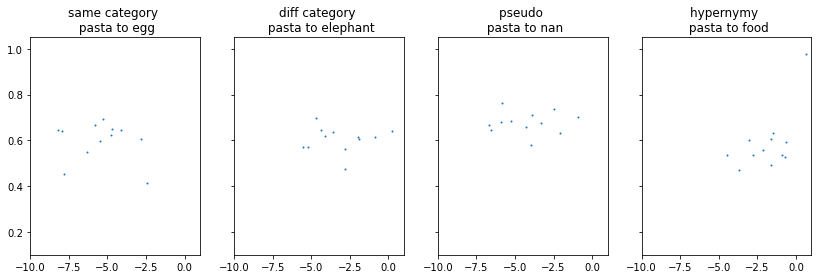

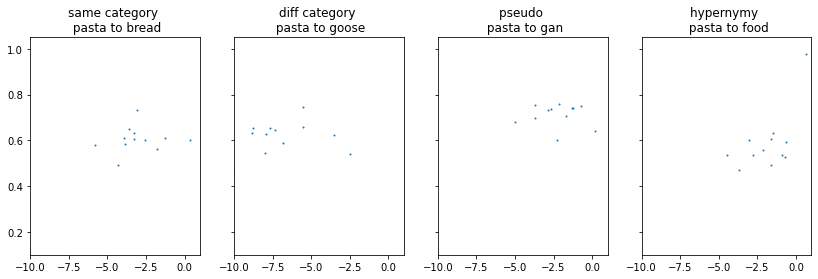

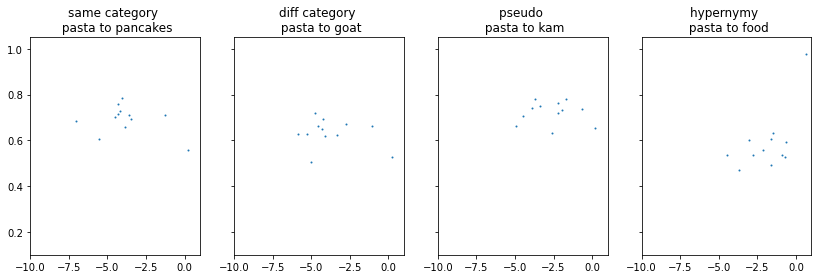

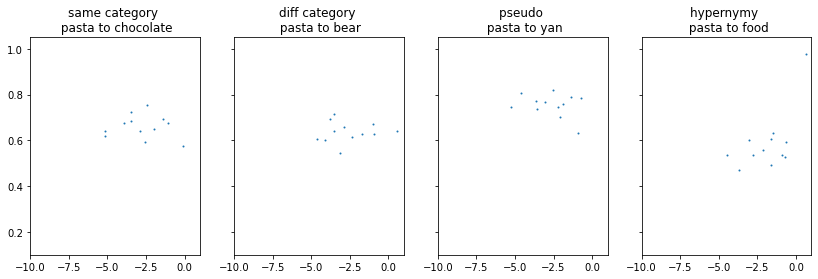

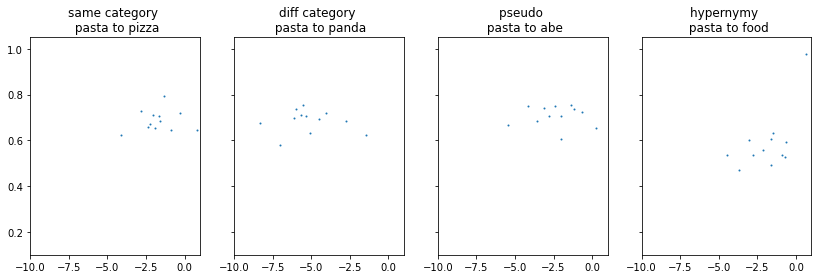

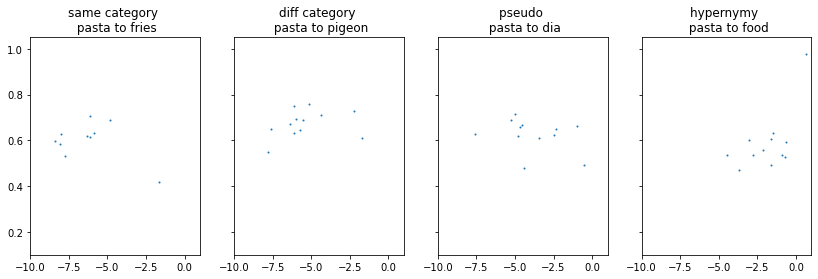

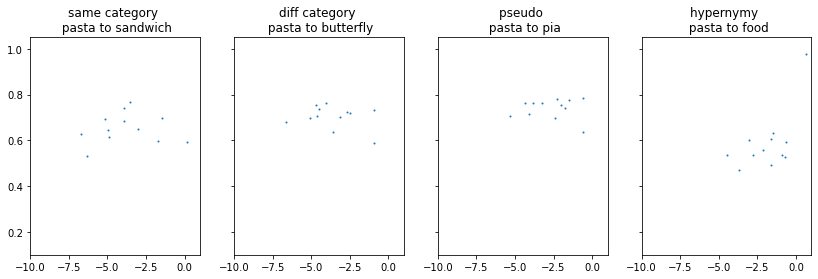

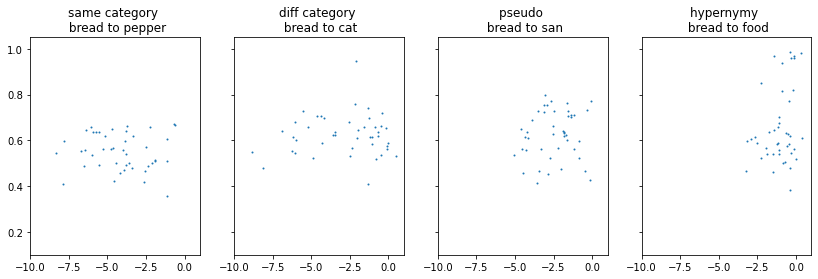

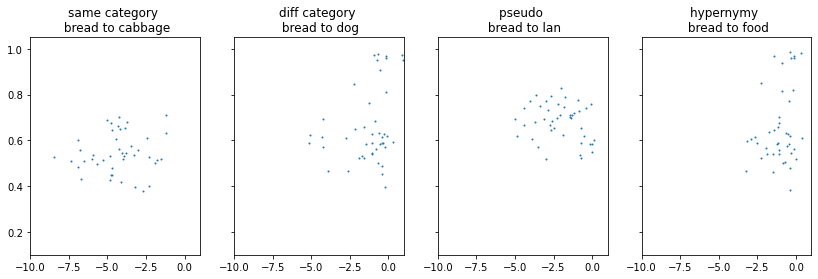

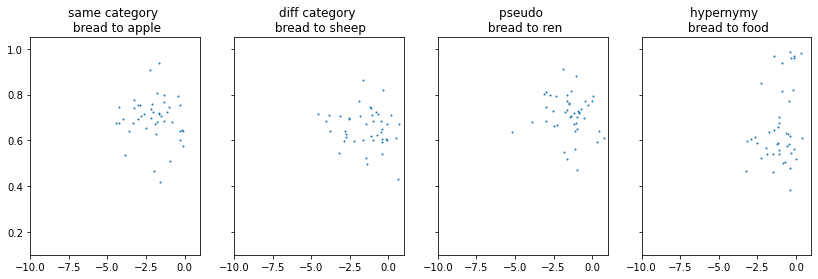

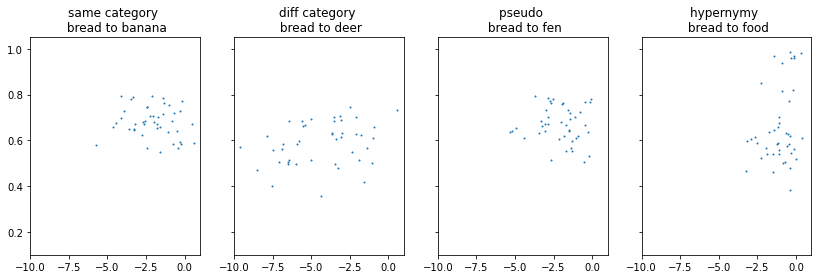

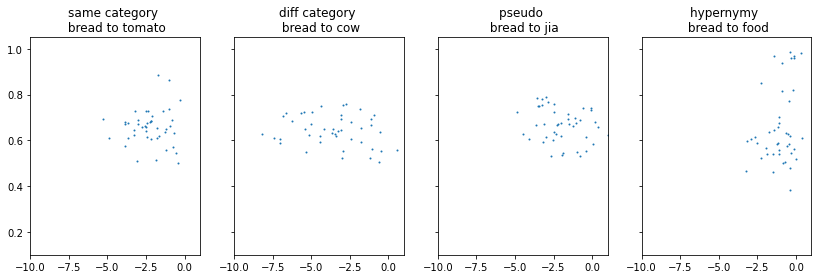

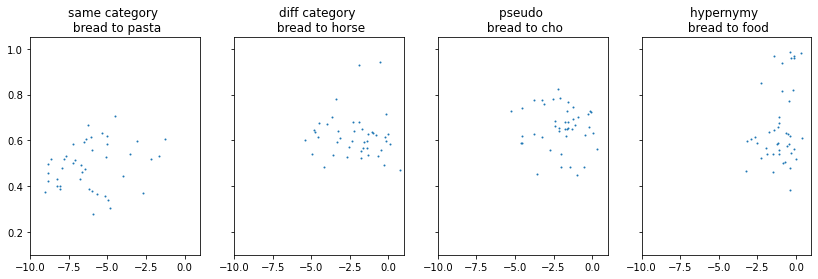

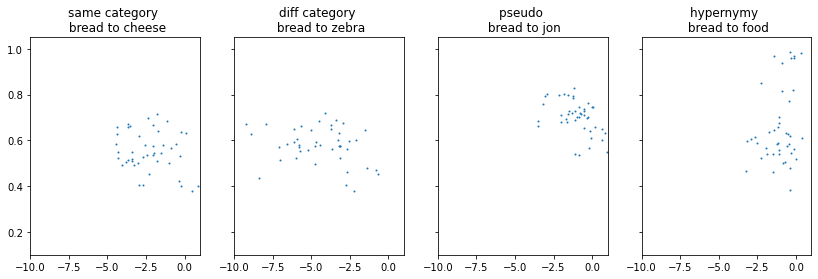

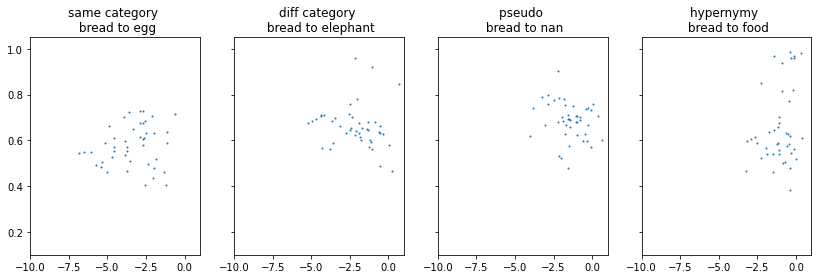

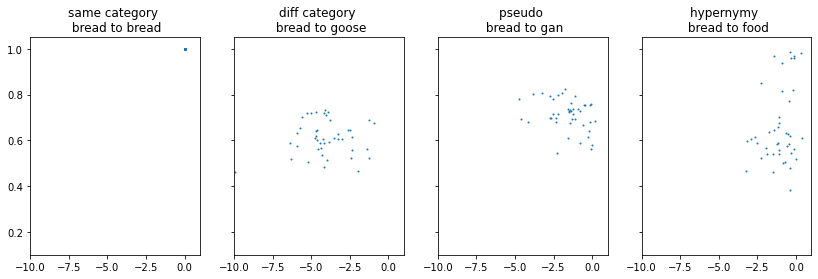

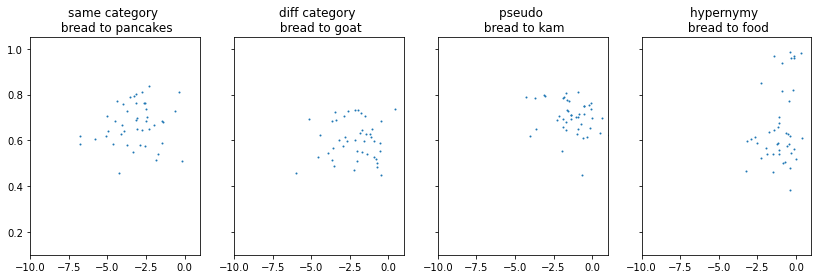

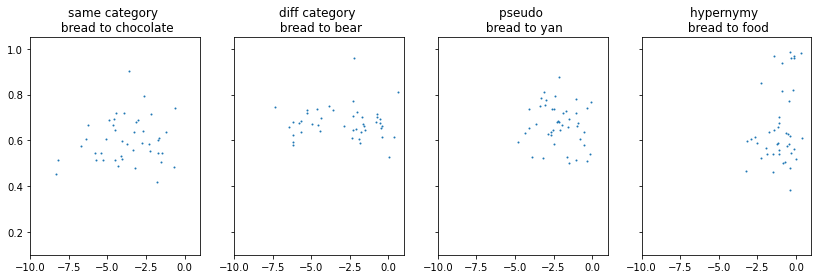

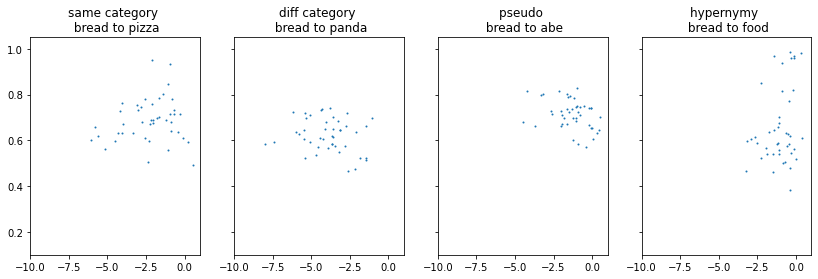

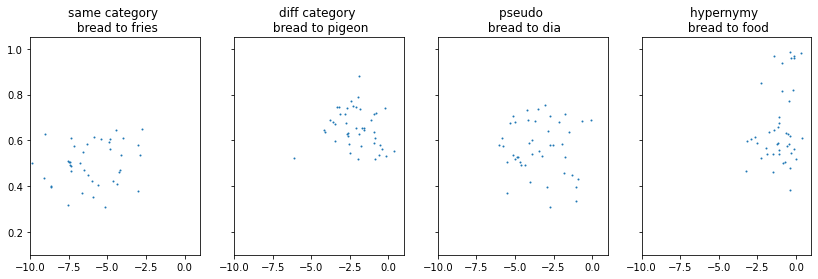

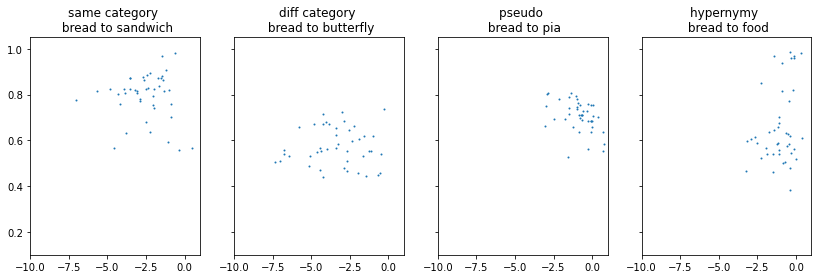

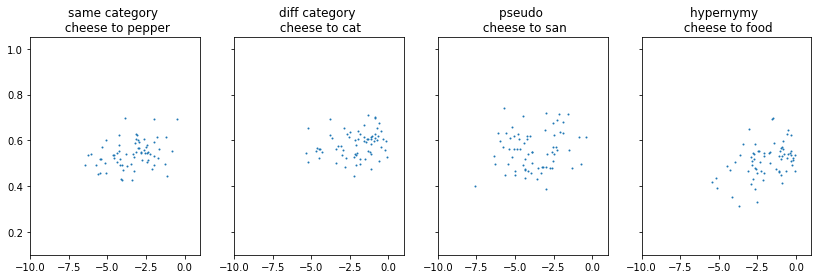

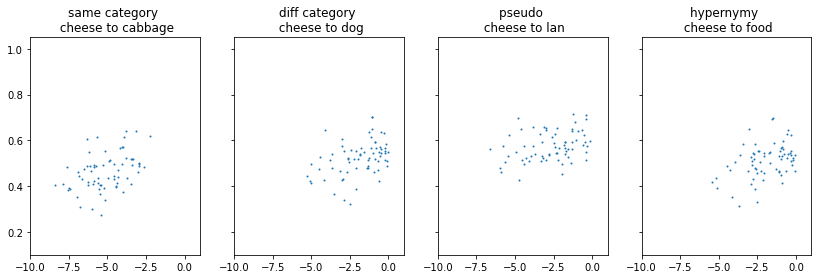

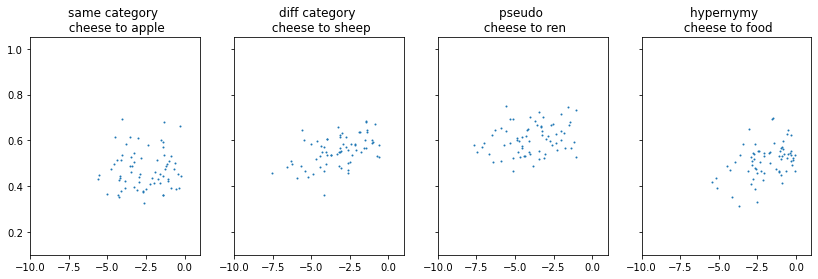

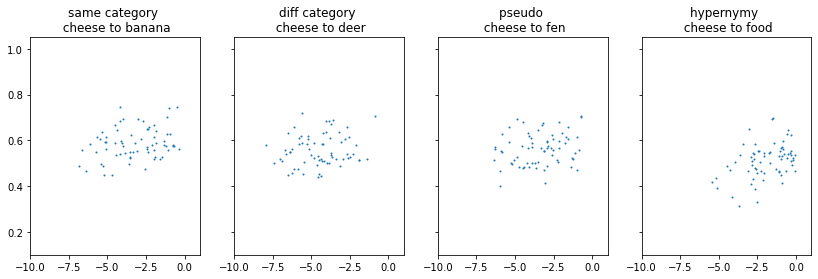

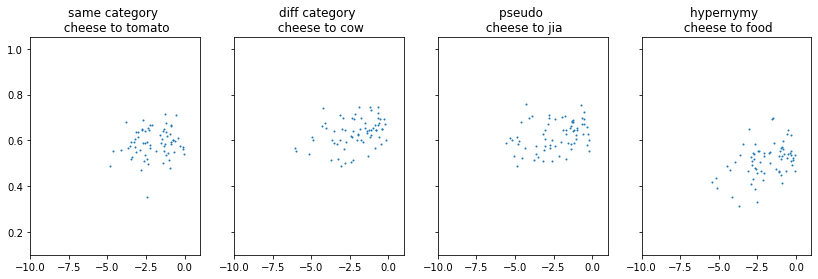

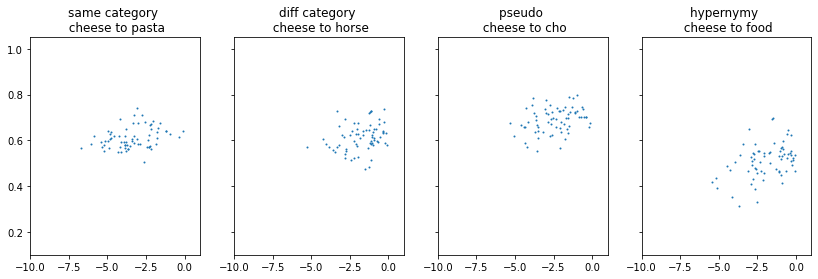

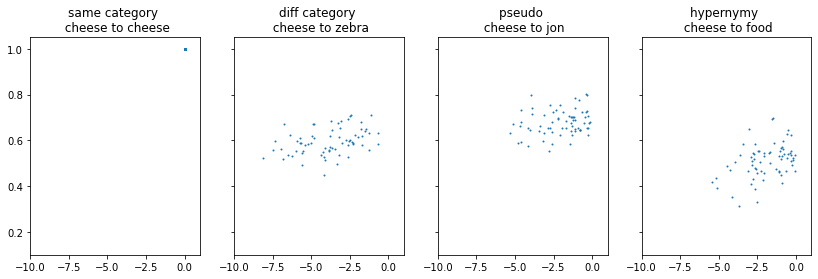

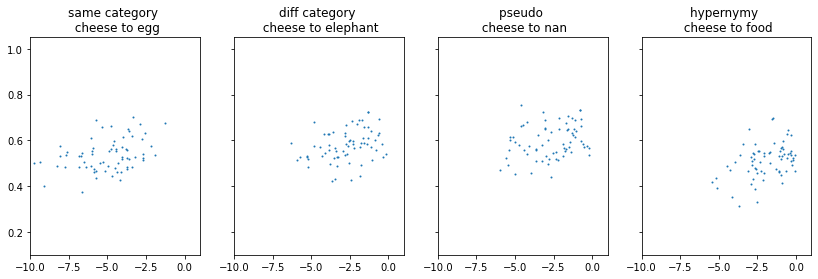

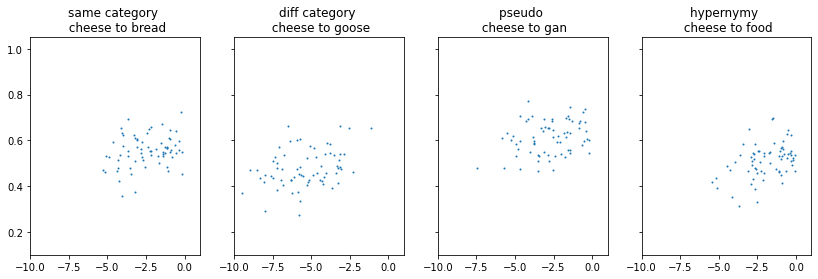

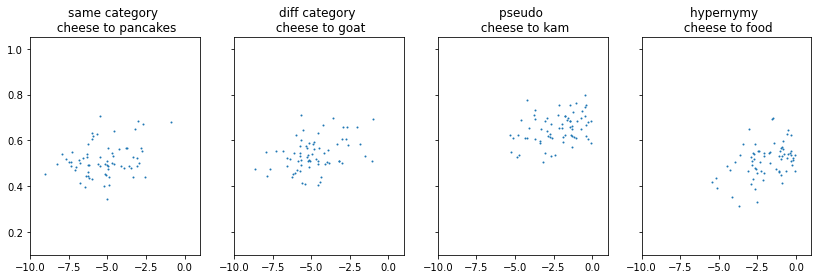

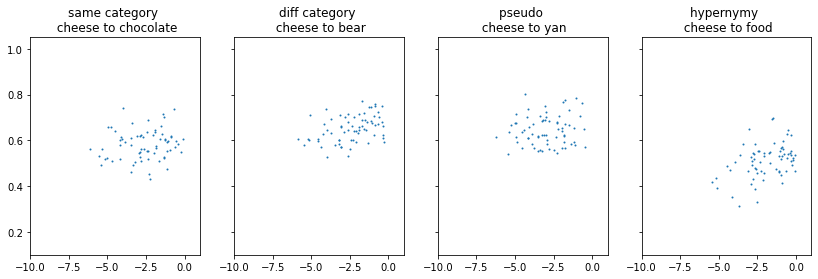

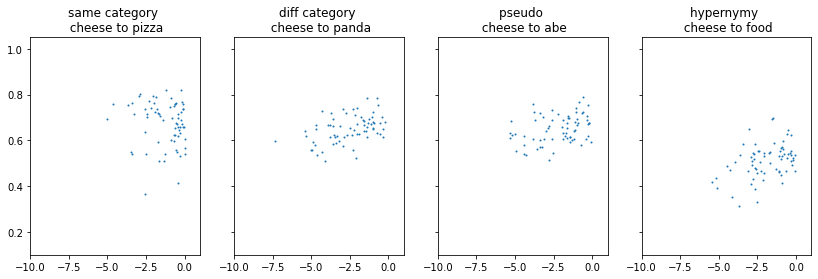

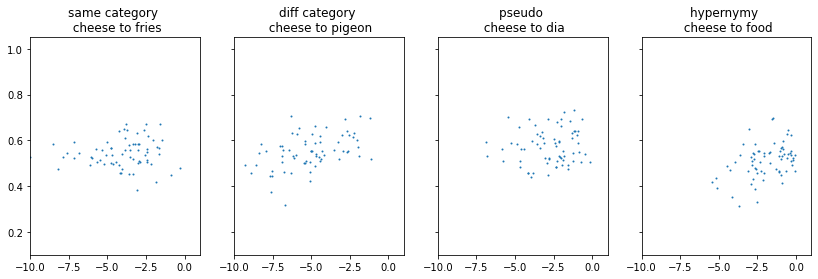

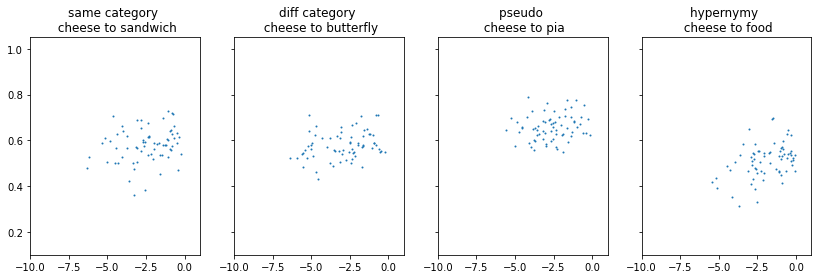

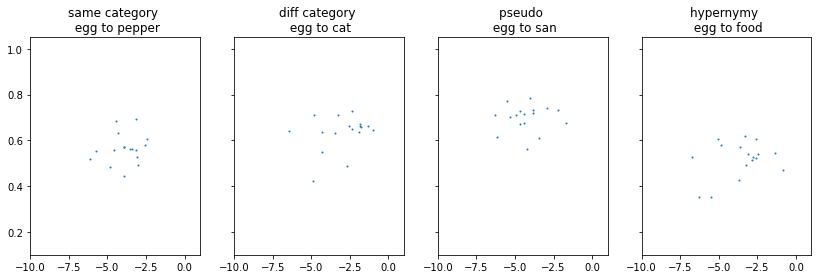

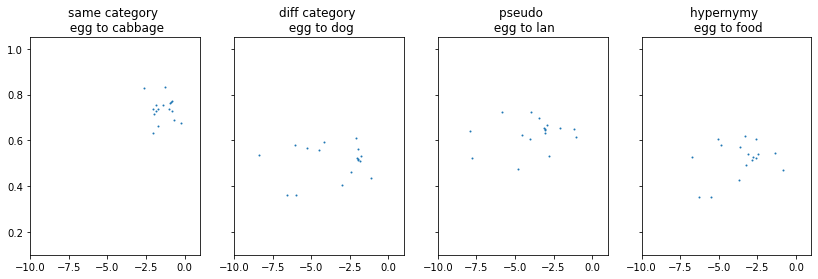

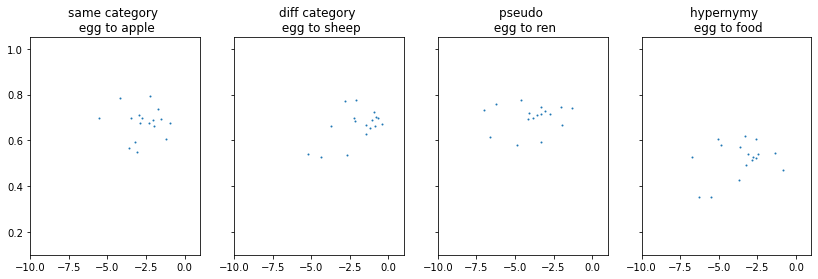

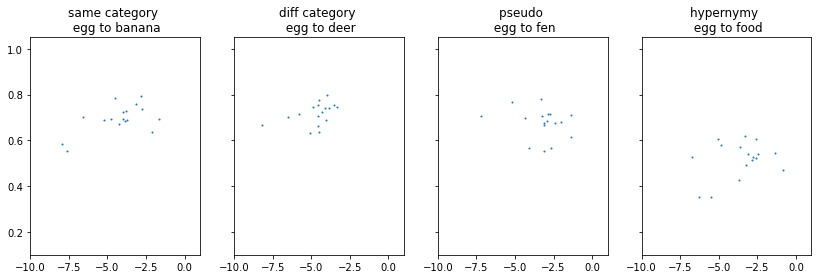

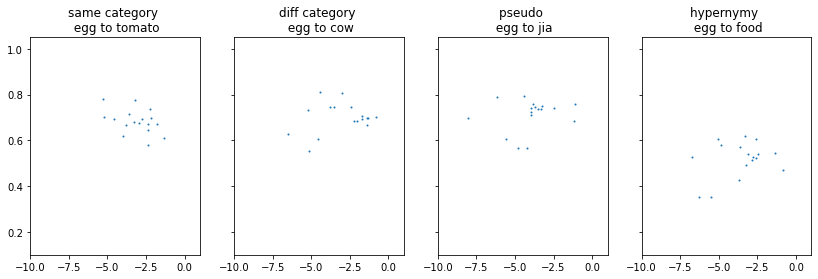

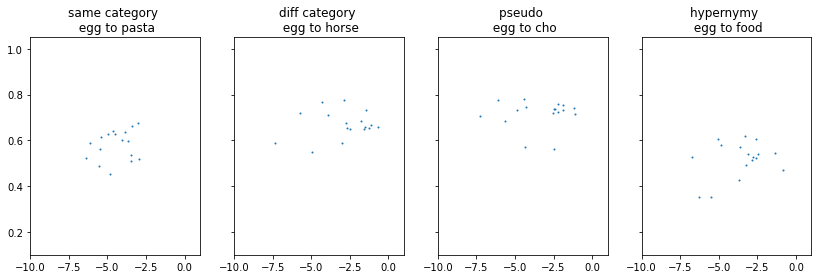

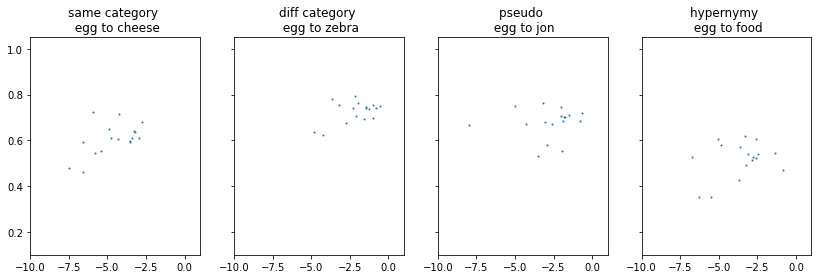

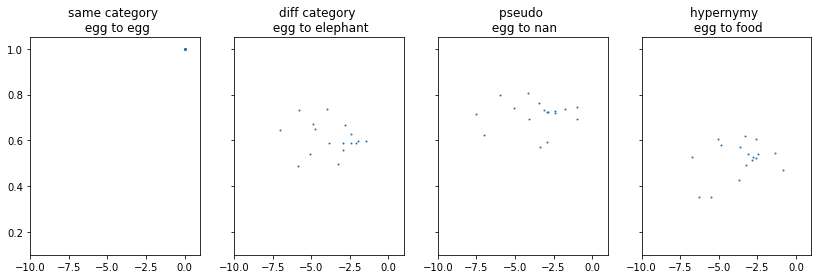

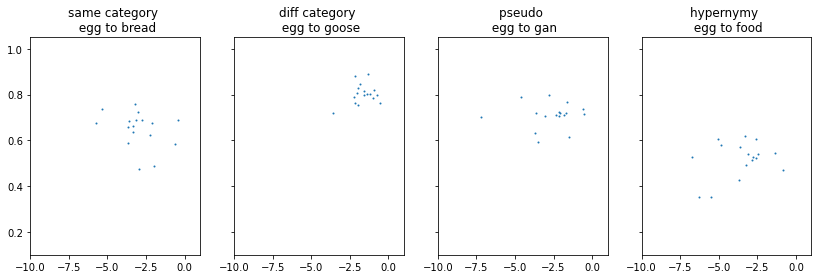

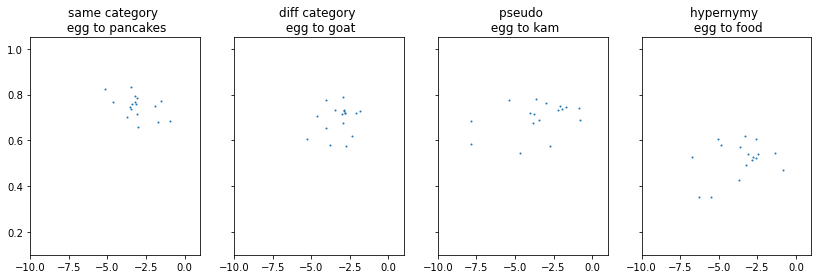

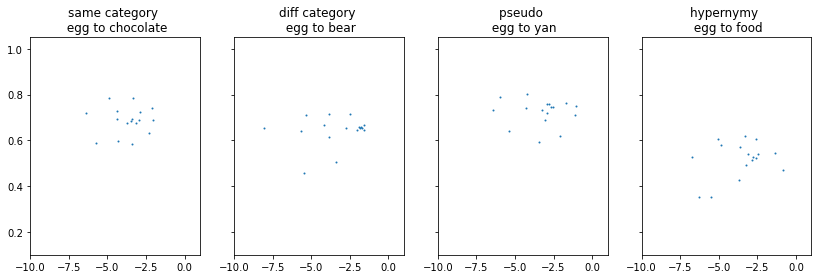

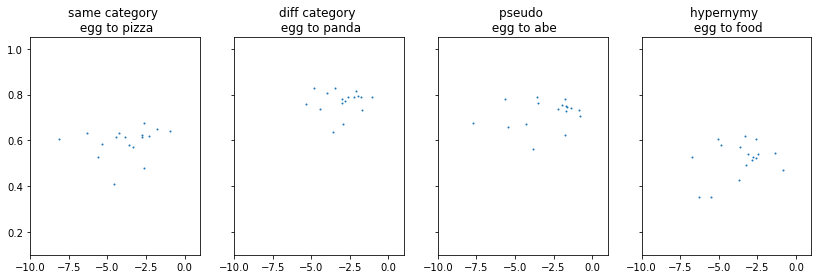

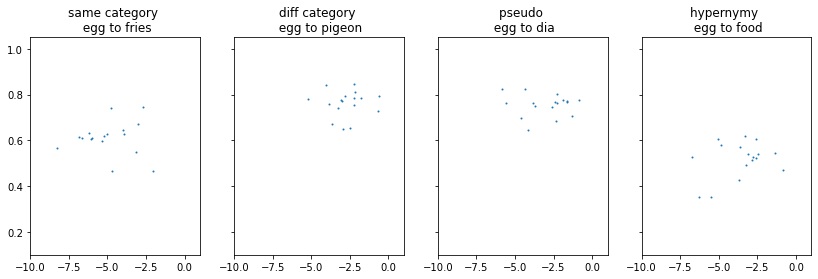

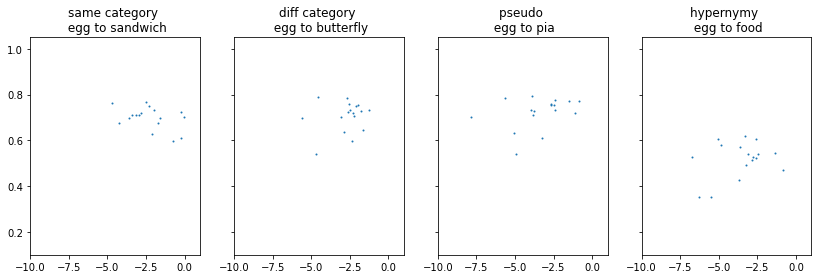

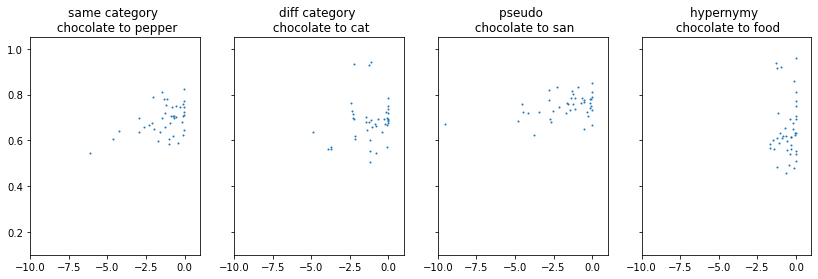

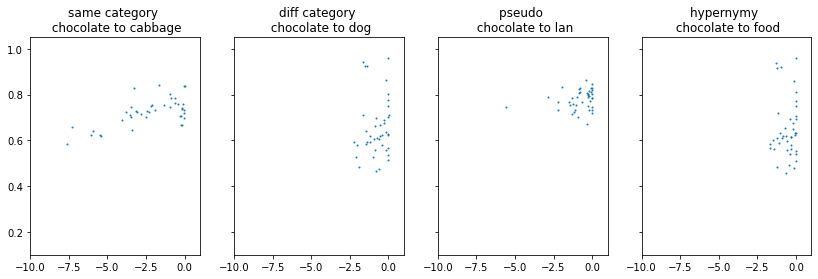

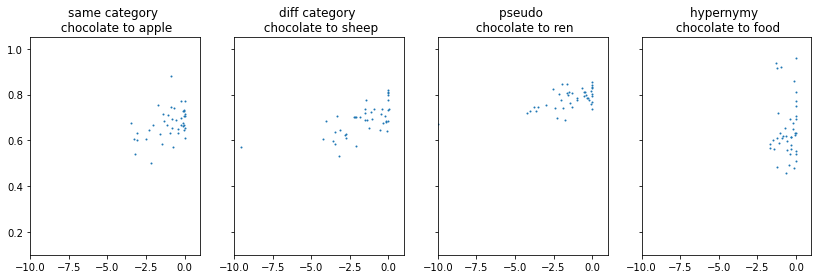

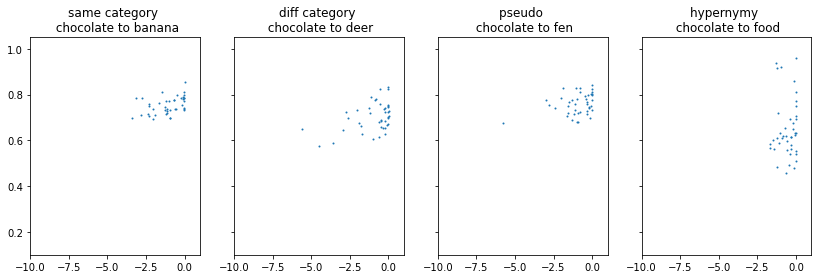

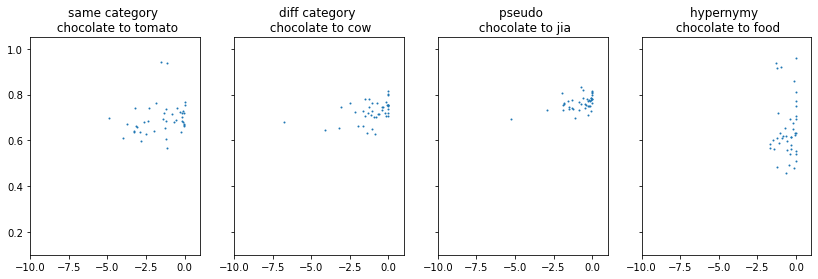

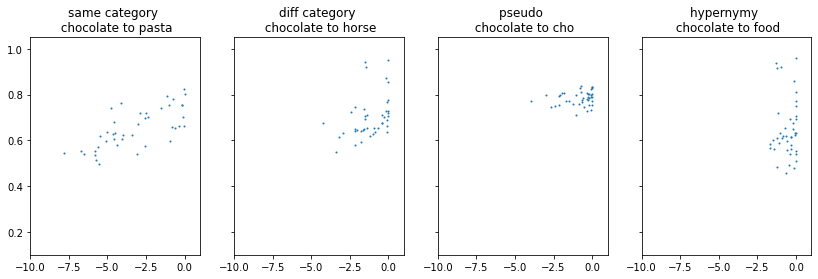

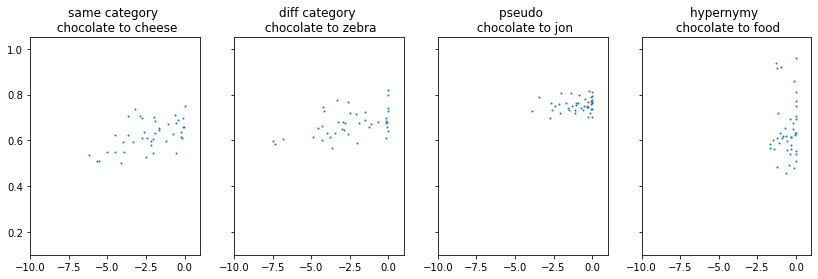

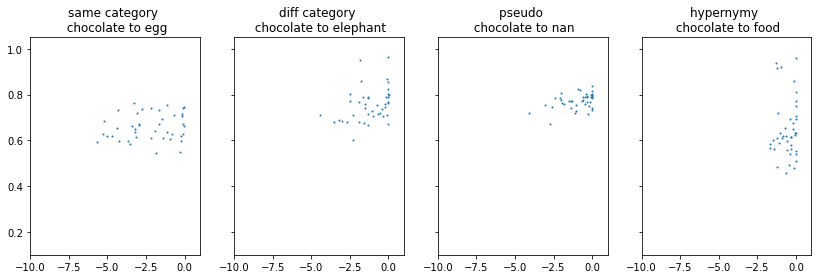

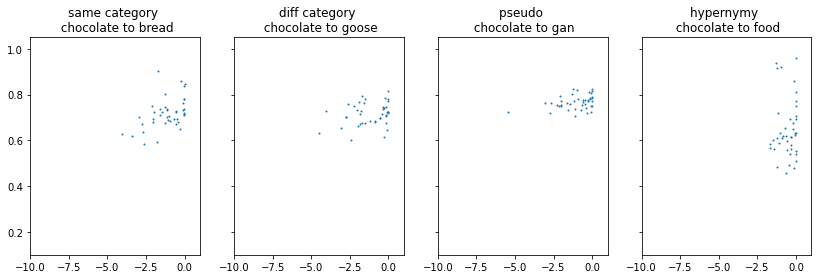

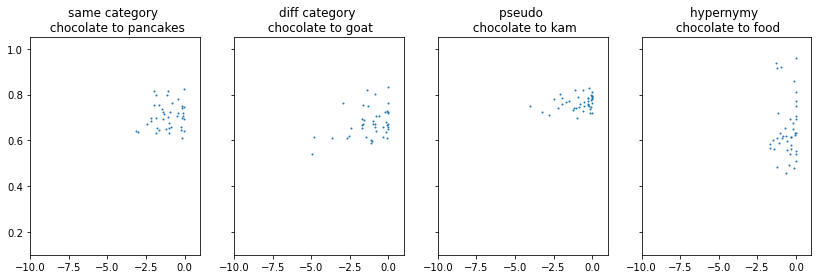

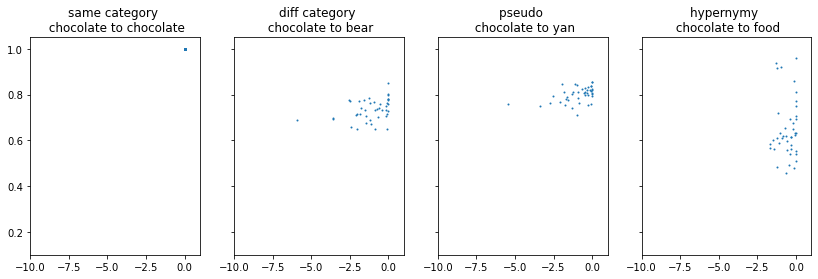

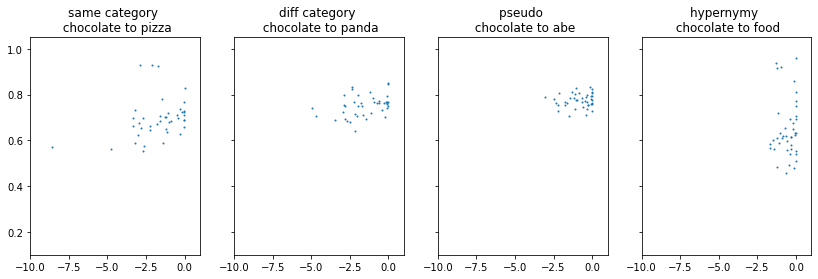

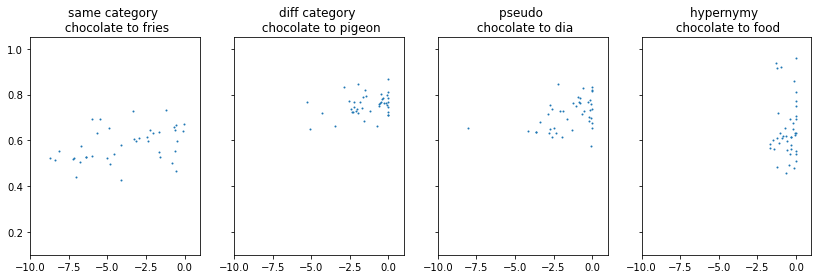

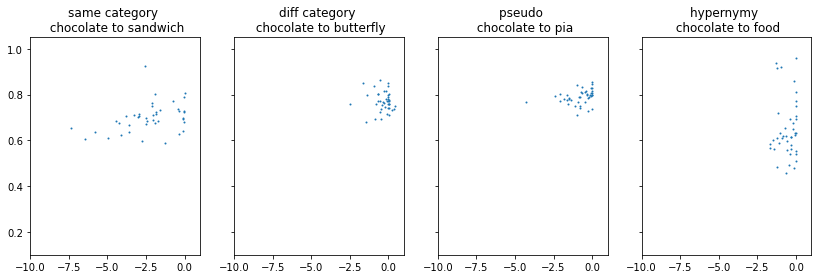

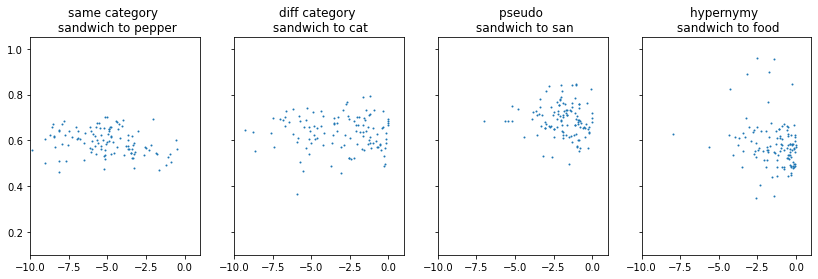

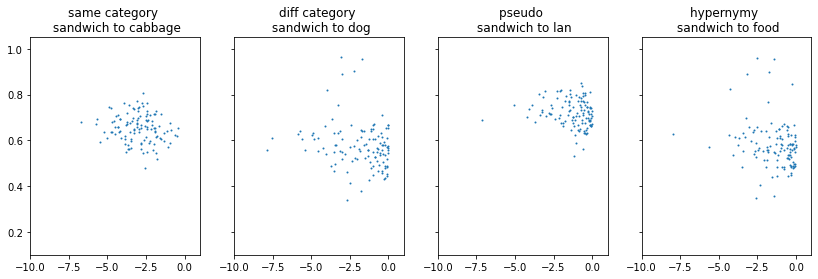

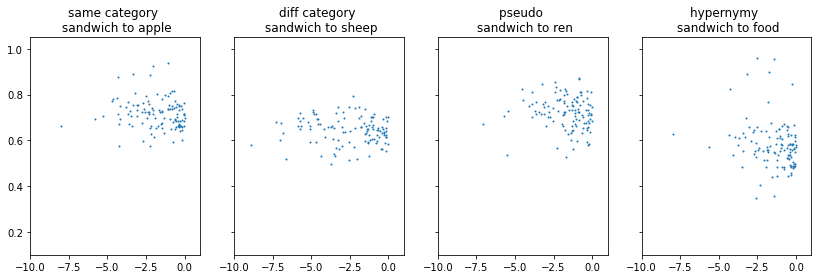

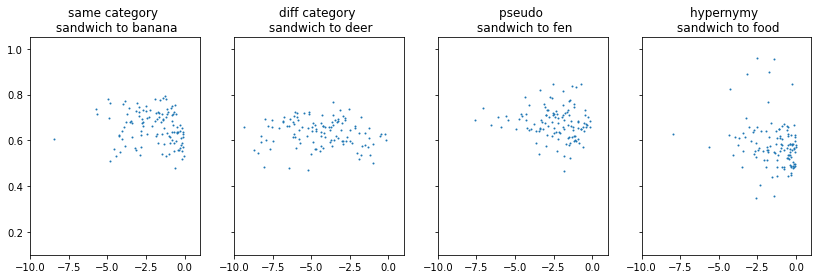

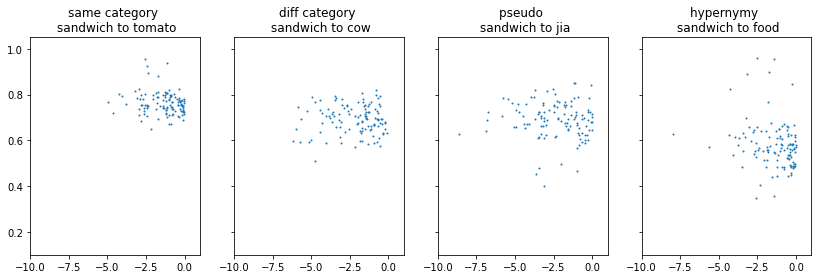

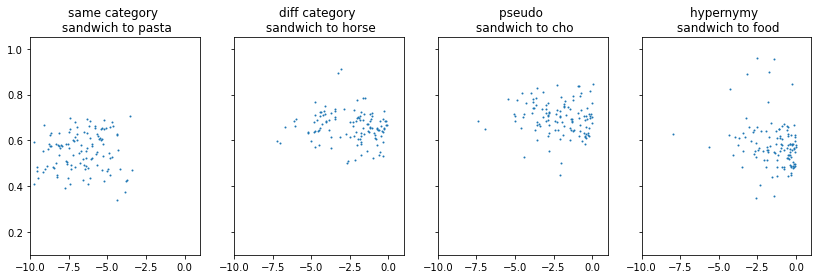

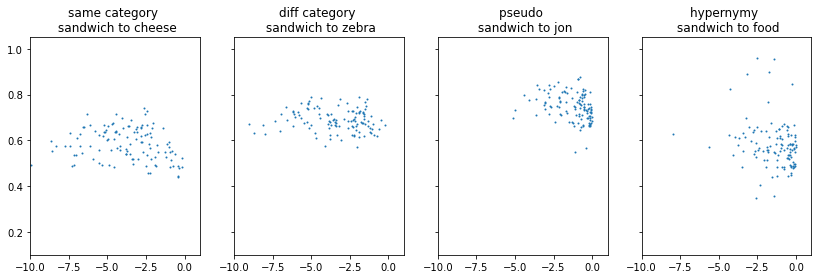

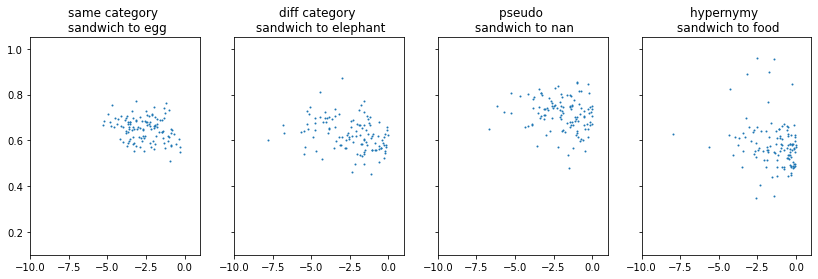

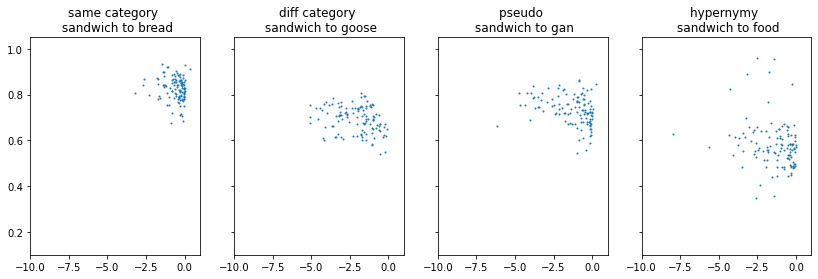

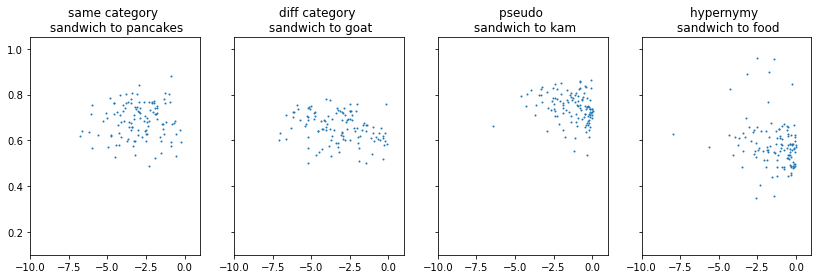

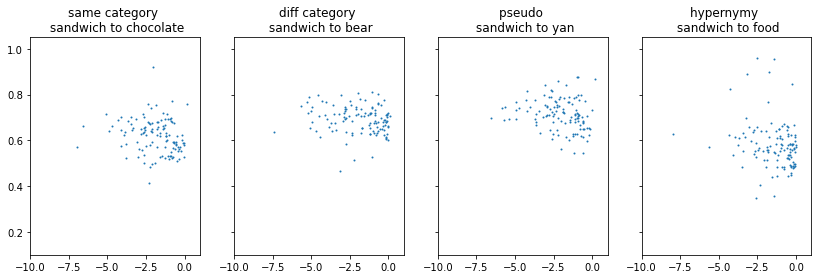

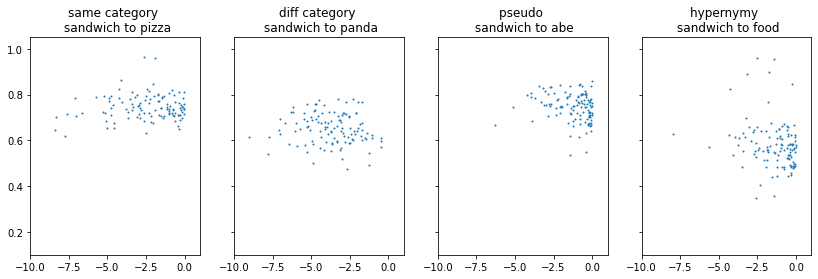

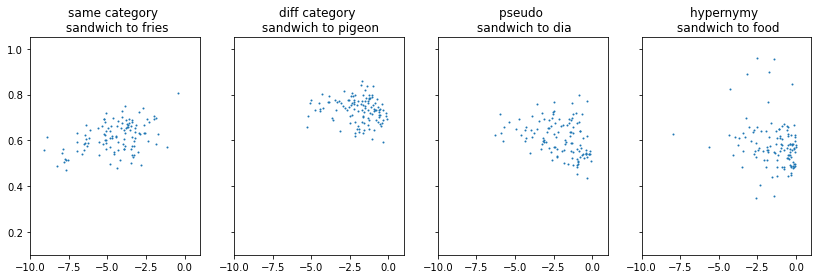

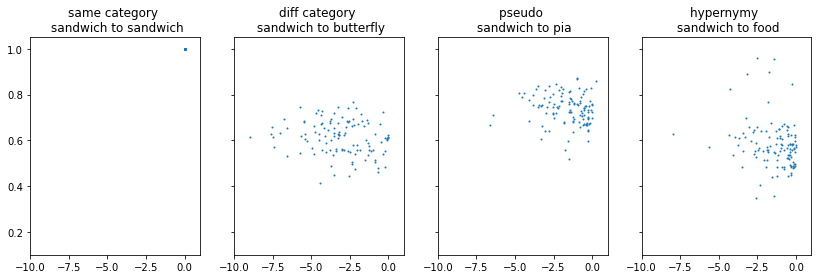

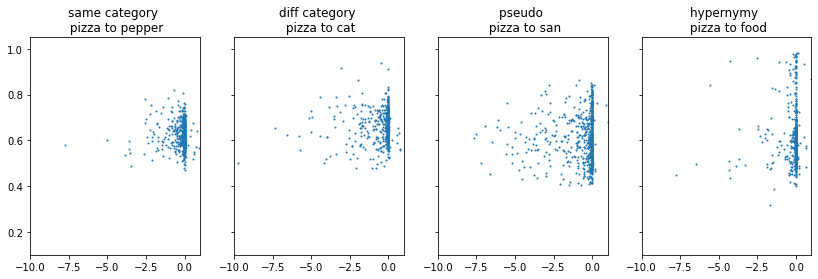

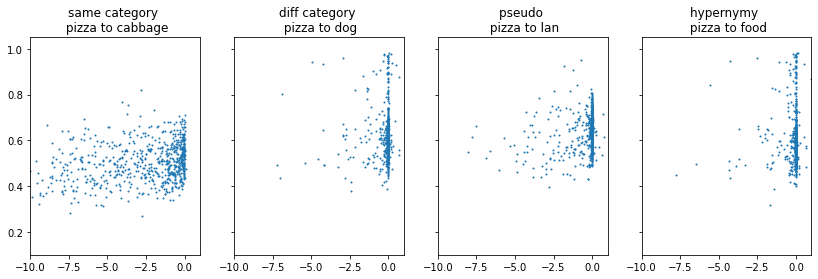

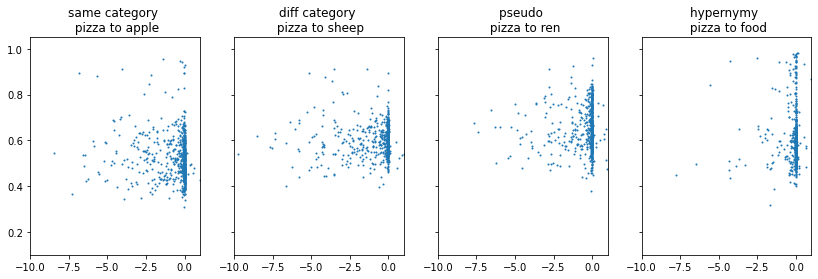

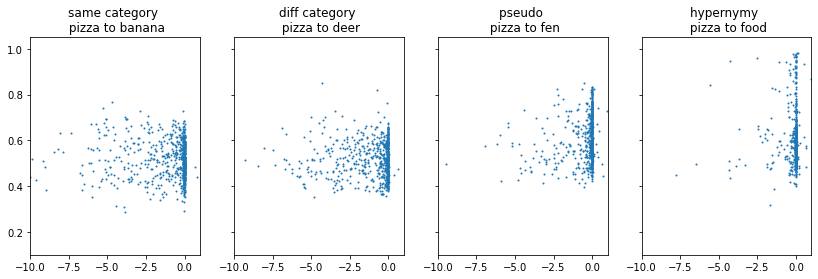

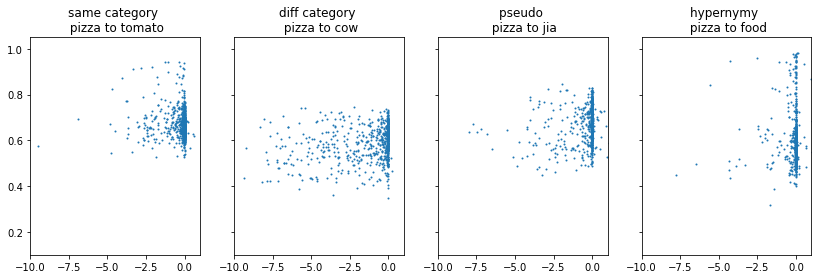

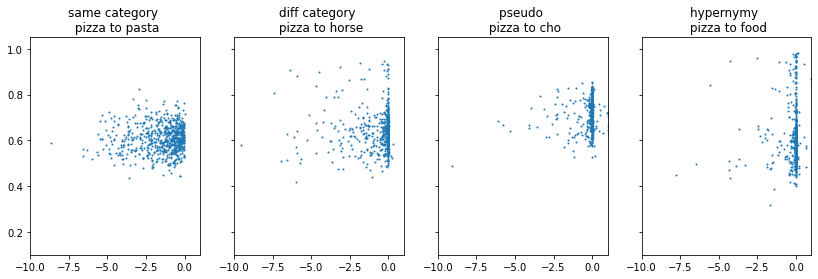

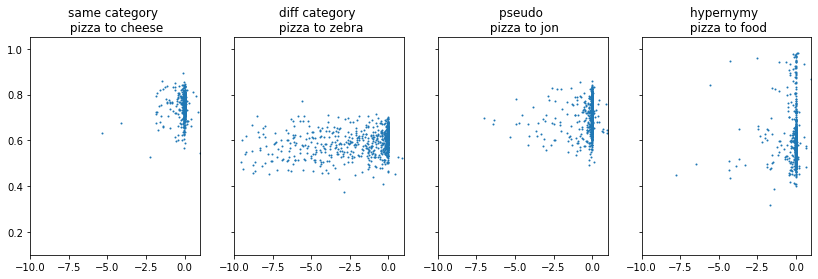

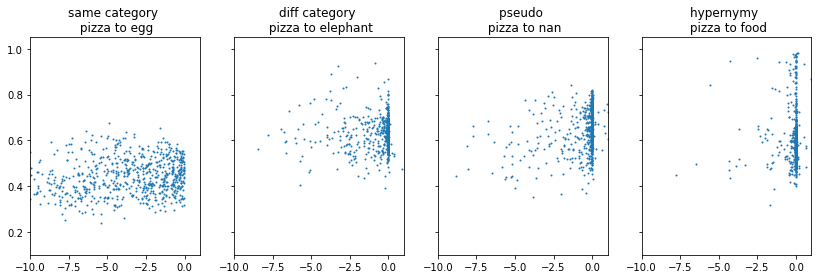

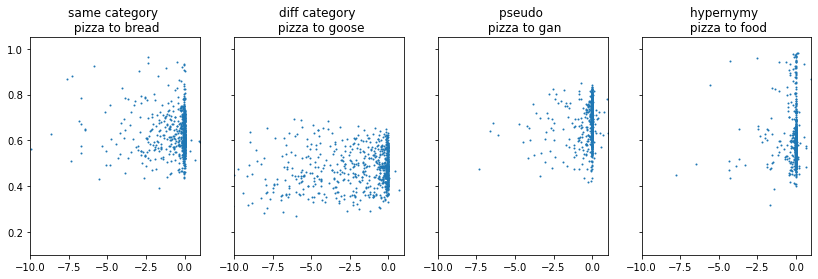

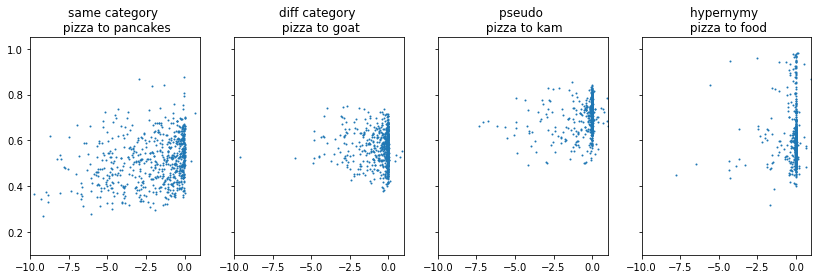

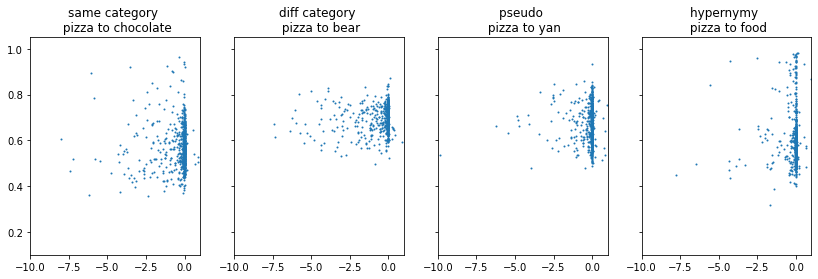

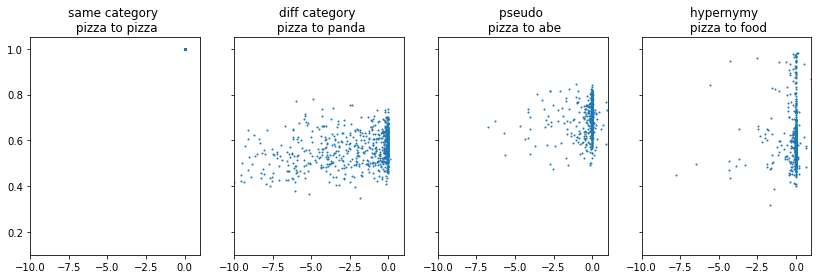

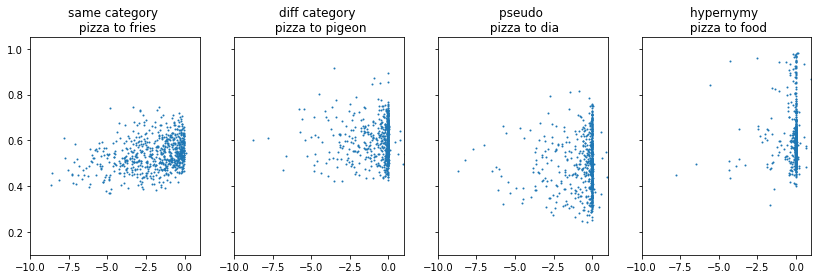

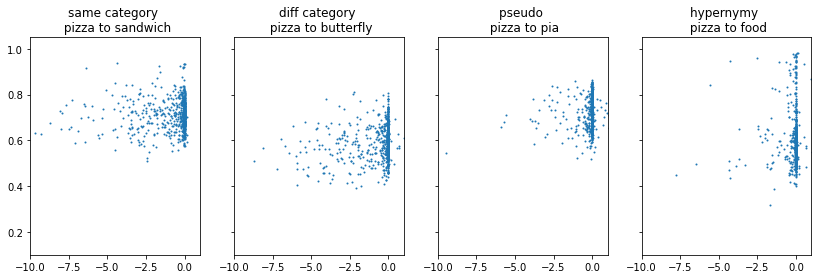

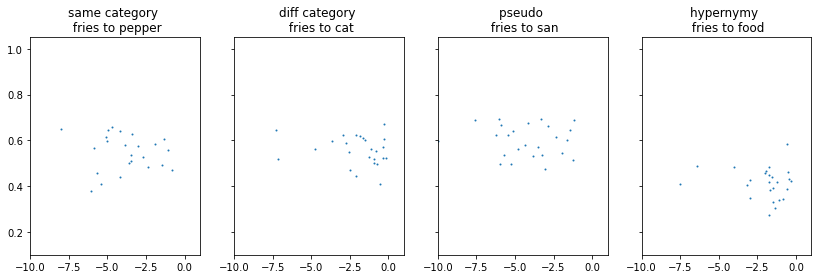

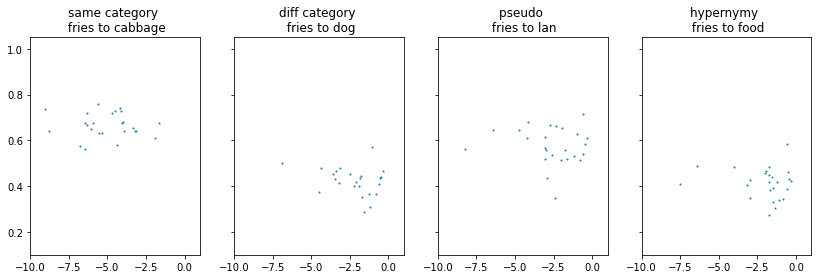

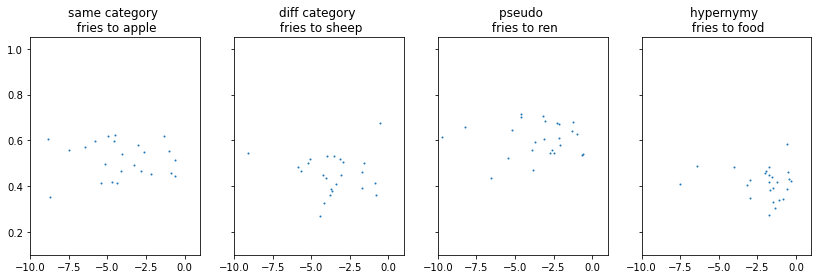

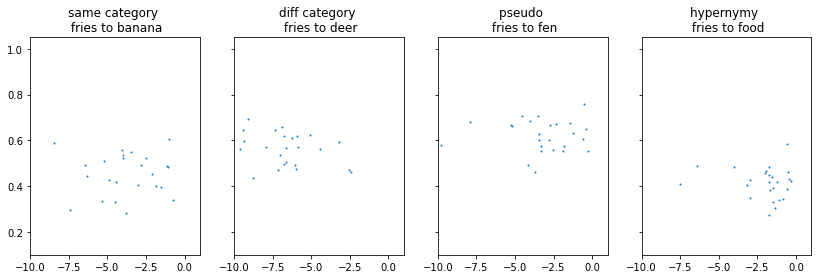

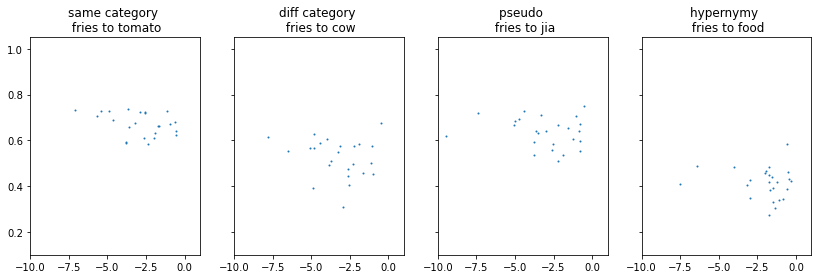

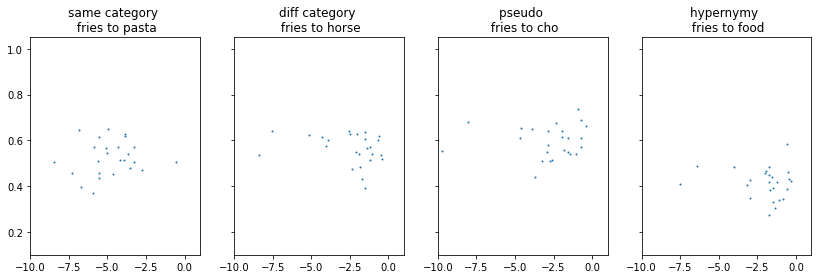

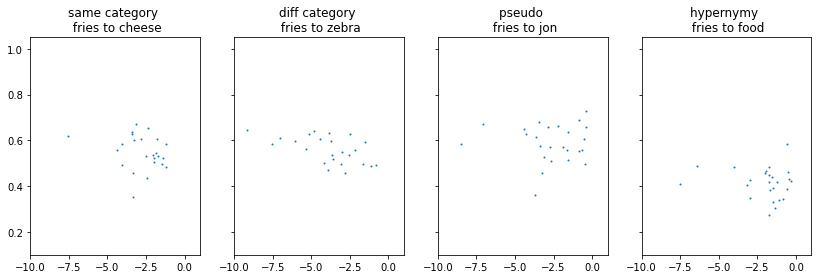

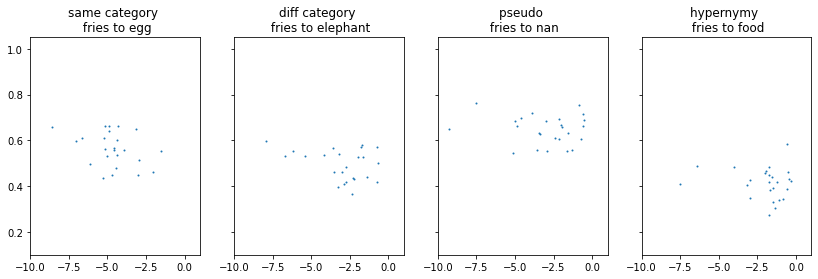

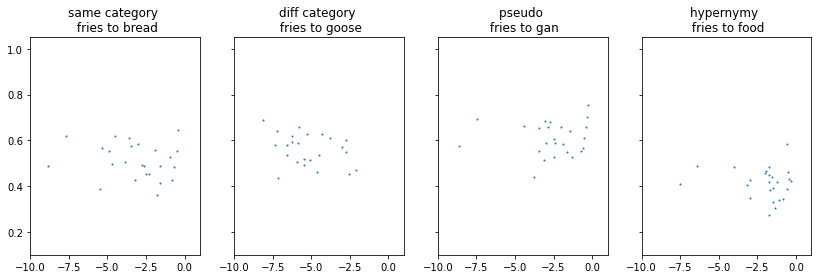

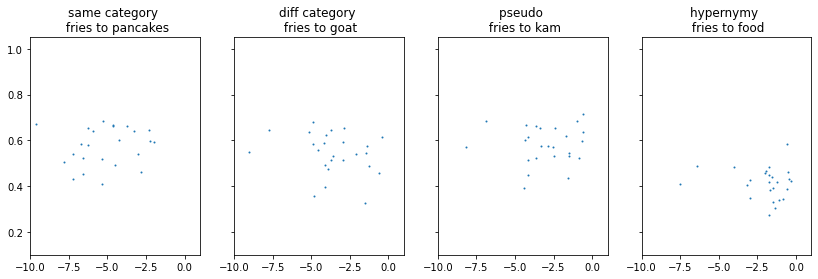

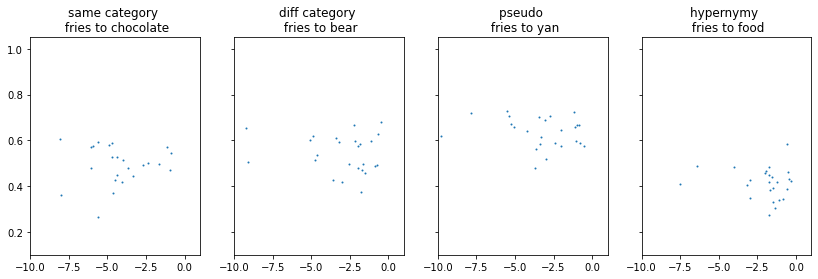

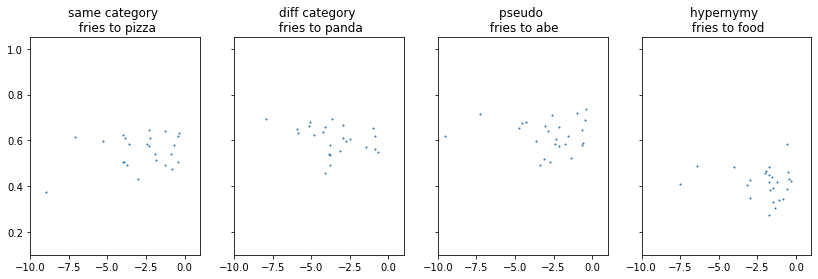

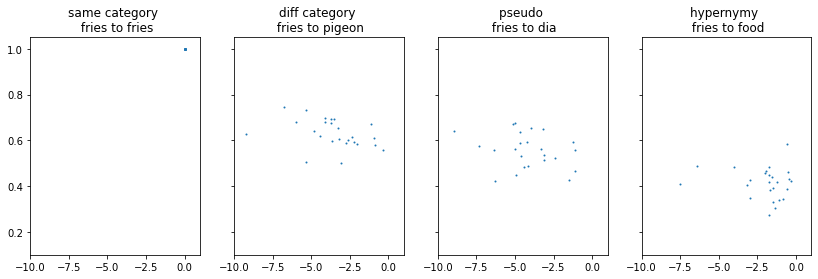

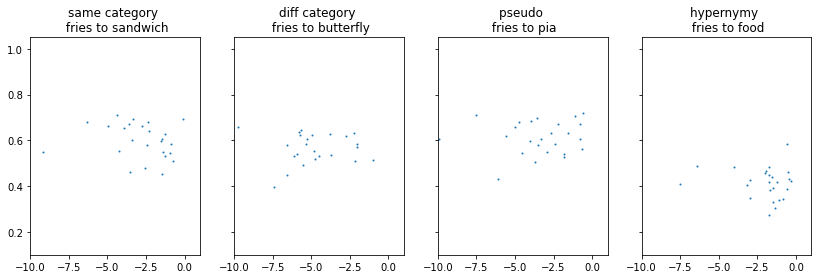

In [22]:
'''use original questions'''
def quesfunc(sent):
    return sent
    
for food_idid in range(0,Nscan_food):
    if object_file == "object_list_animal_v10":
        from data.PWI.object_list_animal_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
    elif object_file == "object_list_food_v10":
        from data.PWI.object_list_food_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
    elif object_file == "object_list_animal_nominival_v10":
        from data.PWI.object_list_animal_nominival_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list  
    elif object_file == "object_list_food_nominival_v10":
        from data.PWI.object_list_food_nominival_v10 import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list 
    
    print(len(food_list),food_list)
    print(len(animal_list),animal_list)

    #food_idid=1
    food_list=[food_list[food_idid]]
    target_object=food_list[0]
    answer_item=target_object
    data = []
    word_ref=target_object

    dataset_name='nominival'
    #dataset_name='train'

    description='embed_v2'

    dataset_tailor="{}_Anna_{}".format(dataset_name,description)

    data.extend(json.load(open("data/vqa/{}.json".format(dataset_name))))
    data_food=[]
    for i in range(len(data)):
        for item in data[i]['label'].keys():
            if item in food_list:
                data_food.append(data[i])
    print(len(data_food))
    import json
    with open("data/vqa/"+dataset_tailor+".json", 'w') as f:
        json.dump(data_food, f)
    print(dataset_tailor)

    '''start vqa test'''

    '''
    1) dataset_tailor is the dataset with food_list in answers
    2) keep shuffle=False for a consistent order between different model evaluations
    '''

    vqa.model.eval()
    print(dataset_tailor)
    eval_tuple = get_data_tuple(dataset_tailor,bs=64,shuffle=False, drop_last=False)

    '''
    1) tset.symbolic_vocab.objects
    with a length of 1600
    including all the objects from RNN
    2) dset.ans2label
    with a length of 3129
    including all the answers from VQA
    '''

    food_obj_id = [tset.symbolic_vocab.objects.index(food_tmp) for food_tmp in food_list]
    food_ans_id = [dset.ans2label[food_tmp] for food_tmp in food_list]
    print(food_obj_id)
    print(food_ans_id)

    # animal_obj_id = [tset.symbolic_vocab.objects.index(animal_tmp) for animal_tmp in animal_list]
    # animal_ans_id = [dset.ans2label[animal_tmp] for animal_tmp in animal_list]
    # print(animal_obj_id)
    # print(animal_ans_id)
    '''no tags'''
    
    target_list = food_list
    use_category = food_obj_id
    replace_obj_id = food_list # not used but need to define

    quesid6 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=False,
                               feat_filter_en=True,
                               No_tags=True
                              )

    
    '''no replacement'''
    target_list = food_list
    use_category = food_obj_id
    replace_obj_id = food_list # not used but need to define

    quesid0 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=False,
                               feat_filter_en=True,
                               No_tags=False
                              )

    LM_choice = quesid0['LM_ans']
    print(len(LM_choice))
    LM_choice_id = [tset.symbolic_vocab.objects.index(_tmp) if _tmp in target_list else 9999 for _tmp in LM_choice ]

    ans_intargetlist=[(i,sco,ans) for i,(sco,ans,multi_ans,N_obj) in enumerate(zip(quesid0['LM_ans_score'],
                                                                           quesid0['LM_ans'],
                                                                           quesid0['multi_ans'],
                                                                           quesid0['N_obj_pick']
                                                                                )) if ans in target_list and N_obj>0]
    target_select_id =[i[0] for i in ans_intargetlist]
    print(len(ans_intargetlist))
    print(len(target_select_id))

    score0=[]
    for i,score,ans in ans_intargetlist:
        score0.append(quesid0['logit'][i][dset.ans2label[ans]].item())

    dict_use=quesid0
    quesid_new={}
    quesid_new['image_feats_bert']=[]
    quesid_new['image_tags_bert']=[]
    quesid_new['image_obj']=[]
    for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                         dict_use['image_tags_bert'],
                                                         dict_use['image_obj'])):
        if i in target_select_id:
            #print(i,feats_bert.shape)
            #print(i,tags_bert.shape)
            #print(i,obj_id)
            quesid_new['image_feats_bert'].append(feats_bert)
            quesid_new['image_tags_bert'].append(tags_bert)
            quesid_new['image_obj'].append(obj_id)
    print(len(quesid_new['image_feats_bert']))
    

    hidden_0,_ = plot_cs_singleobj(quesid_new);

    for offset_id in range(Nscan):

        if object_file == "object_list_animal_v10":
            from data.PWI.object_list_animal_v10 import animal_list,food_list_cate,pseudo_list,hypernymy_list
        elif object_file == "object_list_food_v10":
            from data.PWI.object_list_food_v10 import animal_list,food_list_cate,pseudo_list,hypernymy_list
        elif object_file == "object_list_animal_nominival_v10":
            from data.PWI.object_list_animal_nominival_v10 import animal_list,food_list_cate,pseudo_list,hypernymy_list  
        elif object_file == "object_list_food_nominival_v10":
            from data.PWI.object_list_food_nominival_v10 import animal_list,food_list_cate,pseudo_list,hypernymy_list 
    
        animal_list=[animal_list[offset_id]]
        food_list_cate=[food_list_cate[offset_id]]
        pseudo_list=[pseudo_list[offset_id]]
        hypernymy_list=[hypernymy_list[offset_id]]
        
        #target_list = food_list
        #use_category = food_obj_id
        replace_obj_id = food_list_cate # not used but need to define
        quesid1 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                                   eval_tuple,
                                   tset,
                                   tokenizer,
                                   replace_obj_id,
                                   use_category,
                                   ans_filter = None,
                                   replace_en=True,
                                   feat_filter_en=True,
                                   No_tags=False
                                  )
        score_noreplace=[]
        for i,score,ans in ans_intargetlist:
            score_noreplace.append(quesid1['logit'][i][dset.ans2label[ans]].item())

        dict_use=quesid1
        quesid_new={}
        quesid_new['image_feats_bert']=[]
        quesid_new['image_tags_bert']=[]
        quesid_new['image_obj']=[]
        for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                             dict_use['image_tags_bert'],
                                                             dict_use['image_obj'])):
            if i in target_select_id:
                #print(i,feats_bert.shape)
                #print(i,tags_bert.shape)
                #print(i,obj_id)
                quesid_new['image_feats_bert'].append(feats_bert)
                quesid_new['image_tags_bert'].append(tags_bert)
                quesid_new['image_obj'].append(obj_id)
        #print(len(quesid_new['image_feats_bert']))

        hidden_1,_ = plot_cs_singleobj(quesid_new);

        
        replace_obj_id = animal_list # not used but need to define
        quesid2 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                                   eval_tuple,
                                   tset,
                                   tokenizer,
                                   replace_obj_id,
                                   use_category,
                                   ans_filter = None,
                                   replace_en=True,
                                   feat_filter_en=True,
                                   No_tags=False
                                  )
        score_wreplace=[]
        for i,score,ans in ans_intargetlist:
            score_wreplace.append(quesid2['logit'][i][dset.ans2label[ans]].item())
        dict_use=quesid2
        quesid_new={}
        quesid_new['image_feats_bert']=[]
        quesid_new['image_tags_bert']=[]
        quesid_new['image_obj']=[]
        for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                             dict_use['image_tags_bert'],
                                                             dict_use['image_obj'])):
            if i in target_select_id:
                #print(i,feats_bert.shape)
                #print(i,tags_bert.shape)
                #print(i,obj_id)
                quesid_new['image_feats_bert'].append(feats_bert)
                quesid_new['image_tags_bert'].append(tags_bert)
                quesid_new['image_obj'].append(obj_id)
        #print(len(quesid_new['image_feats_bert']))

        hidden_2,_ = plot_cs_singleobj(quesid_new);
        
        replace_obj_id = pseudo_list # not used but need to define

        quesid5 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                                   eval_tuple,
                                   tset,
                                   tokenizer,
                                   replace_obj_id,
                                   use_category,
                                   ans_filter = None,
                                   replace_en=True,
                                   feat_filter_en=True,
                                   No_tags=False
                                  )
        score_pseudo=[]
        for i,score,ans in ans_intargetlist:
            score_pseudo.append(quesid5['logit'][i][dset.ans2label[ans]].item())
        dict_use=quesid5
        quesid_new={}
        quesid_new['image_feats_bert']=[]
        quesid_new['image_tags_bert']=[]
        quesid_new['image_obj']=[]
        for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                             dict_use['image_tags_bert'],
                                                             dict_use['image_obj'])):
            if i in target_select_id:
                #print(i,feats_bert.shape)
                #print(i,tags_bert.shape)
                #print(i,obj_id)
                quesid_new['image_feats_bert'].append(feats_bert)
                quesid_new['image_tags_bert'].append(tags_bert)
                quesid_new['image_obj'].append(obj_id)
        #print(len(quesid_new['image_feats_bert']))


        hidden_3,_ = plot_cs_singleobj(quesid_new);

        if offset_id == 0:
            replace_obj_id = hypernymy_list # not used but need to define
            quesid4 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                                       eval_tuple,
                                       tset,
                                       tokenizer,
                                       replace_obj_id,
                                       use_category,
                                       ans_filter = None,
                                       replace_en=True,
                                       feat_filter_en=True,
                                       No_tags=False
                                      ) 
            score_hyponymy=[]
            for i,score,ans in ans_intargetlist:
                score_hyponymy.append(quesid4['logit'][i][dset.ans2label[ans]].item())
            dict_use=quesid4
            quesid_new={}
            quesid_new['image_feats_bert']=[]
            quesid_new['image_tags_bert']=[]
            quesid_new['image_obj']=[]
            for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                                 dict_use['image_tags_bert'],
                                                                 dict_use['image_obj'])):
                if i in target_select_id:
                    #print(i,feats_bert.shape)
                    #print(i,tags_bert.shape)
                    #print(i,obj_id)
                    quesid_new['image_feats_bert'].append(feats_bert)
                    quesid_new['image_tags_bert'].append(tags_bert)
                    quesid_new['image_obj'].append(obj_id)
            print(len(quesid_new['image_feats_bert']))

            hidden_4,_ = plot_cs_singleobj(quesid_new);

        cs_index = 0#food_list.index(answer_item)
        s_no=[]
        s_same=[]
        s_diff=[]
        s_pseudo=[]
        s_hyponymy=[]
        #s_notags=[]
        for i,score,ans in ans_intargetlist:
            if ans==answer_item:
                s_no.append(quesid0['logit'][i][dset.ans2label[ans]].item())
                s_same.append(quesid1['logit'][i][dset.ans2label[ans]].item())
                s_diff.append(quesid2['logit'][i][dset.ans2label[ans]].item())
                s_pseudo.append(quesid5['logit'][i][dset.ans2label[ans]].item())
                s_hyponymy.append(quesid4['logit'][i][dset.ans2label[ans]].item())
                #s_notags.append(quesid6['logit'][i][dset.ans2label[ans]].item())
        s_no=np.array(s_no)
        s_same=np.array(s_same)
        s_diff=np.array(s_diff)
        s_pseudo=np.array(s_pseudo)
        s_hyponymy=np.array(s_hyponymy)
        #s_notags=np.array(s_notags)
        p_no=-log2(s_no)
        p_sa=-log2(s_same)
        p_di=-log2(s_diff)
        p_ps=-log2(s_pseudo)
        p_hy=-log2(s_hyponymy)
        #p_notags=-log2(s_notags)

        f_sa=p_no-p_sa
        f_di=p_no-p_di
        f_ps=p_no-p_ps
        f_hy=p_no-p_hy
        #f_notags=p_no-p_notags
        ans_pos=0
        cs_same=[cos_sim(a,b) for a,b in zip(hidden_0[answer_item],hidden_1[food_list_cate[ans_pos]])]
        cs_diff=[cos_sim(a,b) for a,b in zip(hidden_0[answer_item],hidden_2[animal_list[ans_pos]])]
        cs_pseudo=[cos_sim(a,b) for a,b in zip(hidden_0[answer_item],hidden_3[pseudo_list[ans_pos]])]
        cs_hypernymy=[cos_sim(a,b) for a,b in zip(hidden_0[answer_item],hidden_4[hypernymy_list[ans_pos]])]
        #cs_notags=[cos_sim(a,b) for a,b in zip(hidden_0[answer_item],hidden_4[hypernymy_list[ans_pos]])]

        fig, ax = plt.subplots(1, 4,figsize=[14,4],sharey=True)
        #fig.suptitle('Horizontally stacked subplots')
        ax[0].scatter(f_sa,cs_same,s=1)
        ax[0].set_title('same category \n %s to %s'%(answer_item,food_list_cate[ans_pos]))
        ax[0].set_aspect('auto')
        ax[0].set_xlim([-10,1])
        ax[0].set_ylim([0.1,1.05])
        ax[1].scatter(f_di,cs_diff,s=1)
        ax[1].set_title('diff category \n %s to %s'%(answer_item,animal_list[ans_pos]))
        ax[1].set_aspect('auto')
        ax[1].set_xlim([-10,1])
        ax[2].scatter(f_ps,cs_pseudo,s=1)
        ax[2].set_title('pseudo \n %s to %s'%(answer_item,pseudo_list[ans_pos]))
        ax[2].set_aspect('auto')
        ax[2].set_xlim([-10,1])
        ax[3].scatter(f_hy,cs_hypernymy,s=1)
        ax[3].set_title('hypernymy \n %s to %s'%(answer_item,hypernymy_list[ans_pos]))
        ax[3].set_aspect('auto')
        ax[3].set_xlim([-10,1])
#         ax[0].scatter(f_no,cs_notags,s=1)
#         ax[4].set_title('hypernymy \n %s to none'%(answer_item))
#         ax[4].set_aspect('auto')
#         ax[4].set_xlim([-10,1])
        savefig('./save/figures/%s_%s_%d.jpg'%(dataset_name,target_object,offset_id))
        filename0='./save/embed/%s_%s_%d_test2.npz'%(dataset_name,target_object,offset_id)
        savez(filename0,
             quesid0=quesid0,
             quesid1=quesid1,
             quesid2=quesid2,
             quesid5=quesid5,
             quesid4=quesid4,
              quesid6=quesid6,
              target_object=target_object,
              offset_id=offset_id,
              object_file=object_file,
              ans_intargetlist=ans_intargetlist
            )